# INTRUSION DETECTION USING MACHINE LEARNING

DataSet Downloaded from: https://www.unb.ca/cic/datasets/nsl.html

http://kdd.ics.uci.edu/databases/kddcup99/task.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import *

from IPython.display import display,Markdown

from importlib import reload
plt=reload(plt)

In [2]:
column_names = [
'duration',
'protocol_type',  
'service', 
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'packet_class',
'attack_class'
]
len(column_names)

43

In [4]:
df = pd.read_csv(r'..\data\train_data.csv',header=None)
df.columns=column_names
pd.set_option('display.max_columns',43)

In [5]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,packet_class,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [6]:
print("ROWS: ",df.shape[0])
print("COLUMNS: ",df.shape[1])

ROWS:  125973
COLUMNS:  43


In [7]:
print("Total Null Values: \n",df.isnull().sum())
# No NULL values

Total Null Values: 
 duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate         

In [8]:
print("Total Duplicated Values: ",df.duplicated().sum())

Total Duplicated Values:  0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [10]:
# CHANGING OBJECT TYPE TO CATEGORY
df['protocol_type'] = df['protocol_type'].astype('category')
df['service'] = df['service'].astype('category')
df['flag'] = df['flag'].astype('category')
df['land'] = df['land'].astype('category')
df['logged_in'] = df['logged_in'].astype('category')
df['is_guest_login'] = df['is_guest_login'].astype('category')
df['root_shell'] = df['root_shell'].astype('category')
df['is_host_login'] = df['is_host_login'].astype('category')
df['packet_class'] = df['packet_class'].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   duration                     125973 non-null  int64   
 1   protocol_type                125973 non-null  category
 2   service                      125973 non-null  category
 3   flag                         125973 non-null  category
 4   src_bytes                    125973 non-null  int64   
 5   dst_bytes                    125973 non-null  int64   
 6   land                         125973 non-null  category
 7   wrong_fragment               125973 non-null  int64   
 8   urgent                       125973 non-null  int64   
 9   hot                          125973 non-null  int64   
 10  num_failed_logins            125973 non-null  int64   
 11  logged_in                    125973 non-null  category
 12  num_compromised              125973 non-null

In [12]:
df.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.022687,0.000111,0.204409,0.001222,0.279250,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.253530,0.014366,2.149968,0.045239,23.942042,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,3.000000,3.000000,77.000000,5.000000,7479.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


<br/>
<br/>

## UNIVARIATE ANALYSIS

---

### ANALYZING DISTRIBUTIONS

In [13]:
def get_value_counts(data:pd.Series , heading_col1:str , heading_col2:str)->None:   
    temp_df = data.value_counts()
    temp_df.name = heading_col2
    display( Markdown( temp_df.to_markdown() ) )
    print()
    print()
    return




def plot_bar( data:pd.Series , x_label:str , y_label:str , plot_title:str , bar_colors:str )->None:
    plt.figure(facecolor='black',figsize=(6,6))
    ax = plt.axes()
    ax.set_facecolor('black')

    if(len(data.value_counts())>5): max=5
    else: max=len(data.value_counts()) 
    plt.bar(data.value_counts().index[:max] , data.value_counts().values[:max] , color=bar_colors )
    
    plt.xticks(color='white')
    plt.yticks(color='white')
    
    ax.spines['bottom'].set_color('white')
    ax.spines['left'].set_color('white')
    
    plt.xlabel(x_label, fontweight='bold',color='#FFFDA2')
    plt.ylabel(y_label, fontweight='bold',color='#FFFDA2')
    plt.title(plot_title, fontweight='bold',color='#FF5403')
    return




def plot_pie(data:pd.Series , plot_title:str)->None:
    plt.figure(figsize=(6,6))
    
    if(len(data.value_counts())>5): max=5
    else: max=len(data.value_counts()) 

    plt.pie(data.value_counts().values[:max] , labels=data.value_counts().index[:max] , autopct='%.2f%%' , textprops={ 'color': '#000000' } )  
    plt.title(plot_title, fontweight='bold',color='#000000')
    return

In [14]:
def get_describe(data:pd.Series)->None :
    temp_df = data.describe() 
    display( Markdown( temp_df.to_markdown() ) )
    return


def plot_histogram(data:pd.Series,plot_title:str,x_label:str,y_label:str)->None : 
    plt.figure(figsize=(6,6))
    plt.hist(data)
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    return 


def plot_density_plot(data:pd.Series,plot_title:str,x_label:str,y_label:str)->None :
    plt.figure(figsize=(6,6))
    sns.kdeplot(data = data,fill=True)
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    return


def plot_box_plot(data:pd.Series,plot_title:str)->None :
    plt.figure(figsize=(6,6))
    plt.boxplot(data)
    plt.title(plot_title)
    return



def plot_voilin_plot(data:pd.Series,plot_title:str)->None :
    plt.figure(figsize=(6,6))
    plt.violinplot(data,showmedians=True)
    plt.title(plot_title)
    return

In [15]:
def univariate_analysis( data:pd.Series , xlabel:str , ylabel:str , title:str ,color:str )->None:
    if (data.dtype=="category"):
        get_value_counts(data,xlabel,ylabel)
        plot_bar(data,xlabel,ylabel,title,color)
        plot_pie(data,title)

    else:
        get_describe(data)
        plot_histogram(data,title,xlabel,ylabel)
        plot_density_plot(data,title,xlabel,ylabel)
        plot_box_plot(data,title)
        plot_voilin_plot(data,title)

    plt.show()



|       |   duration |
|:------|-----------:|
| count | 125973     |
| mean  |    287.145 |
| std   |   2604.52  |
| min   |      0     |
| 25%   |      0     |
| 50%   |      0     |
| 75%   |      0     |
| max   |  42908     |

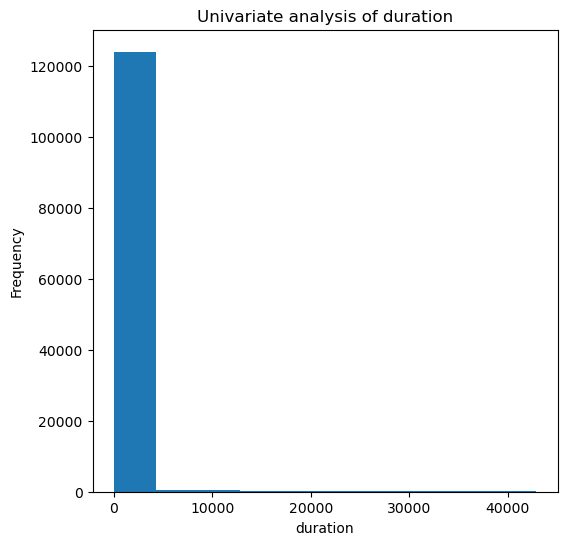

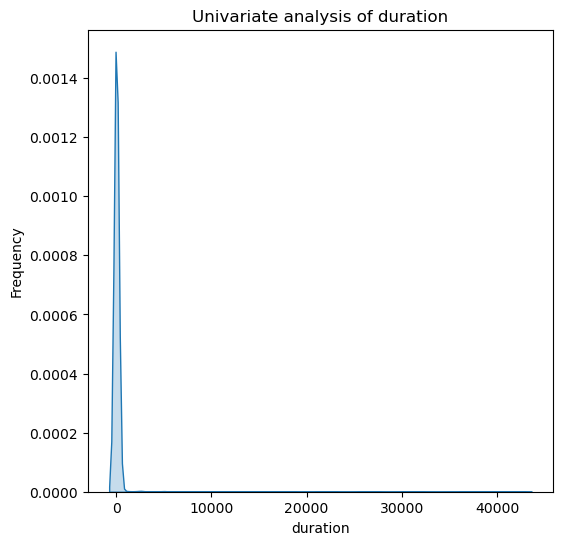

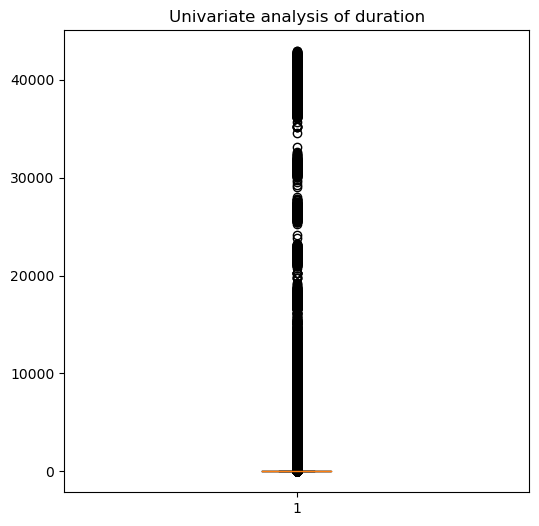

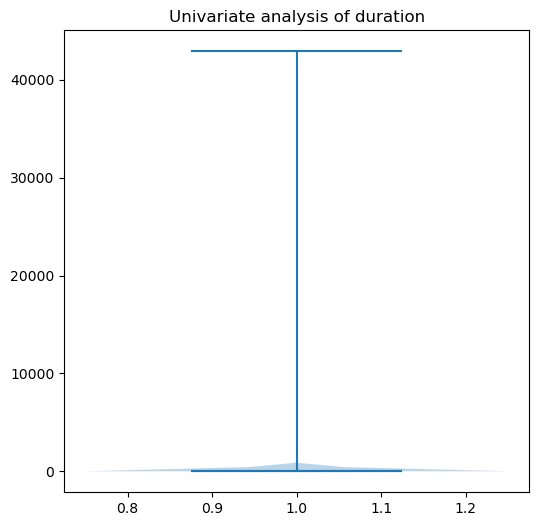

|      |   Frequency |
|:-----|------------:|
| tcp  |      102689 |
| udp  |       14993 |
| icmp |        8291 |

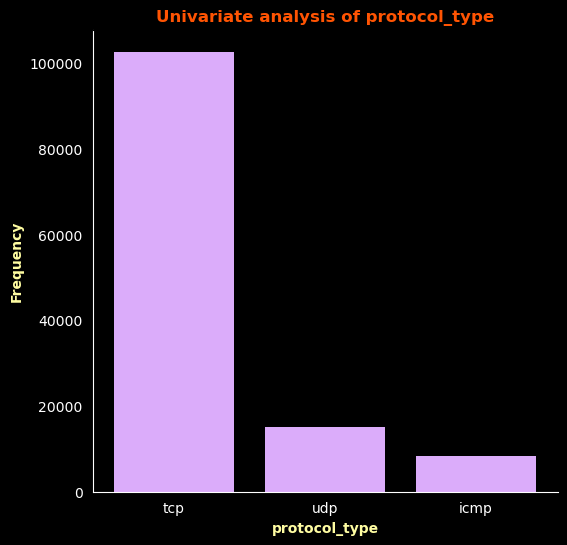

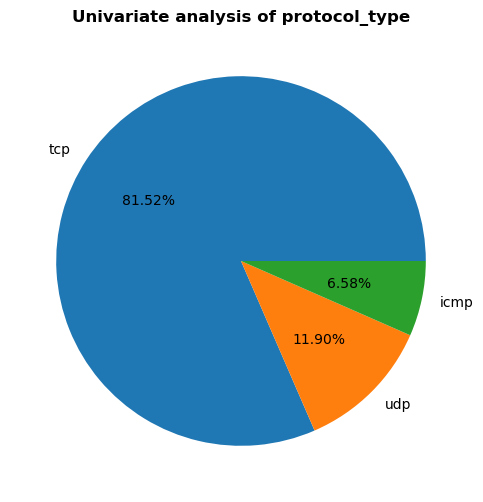

|             |   Frequency |
|:------------|------------:|
| http        |       40338 |
| private     |       21853 |
| domain_u    |        9043 |
| smtp        |        7313 |
| ftp_data    |        6860 |
| eco_i       |        4586 |
| other       |        4359 |
| ecr_i       |        3077 |
| telnet      |        2353 |
| finger      |        1767 |
| ftp         |        1754 |
| auth        |         955 |
| Z39_50      |         862 |
| uucp        |         780 |
| courier     |         734 |
| bgp         |         710 |
| whois       |         693 |
| uucp_path   |         689 |
| iso_tsap    |         687 |
| time        |         654 |
| imap4       |         647 |
| nnsp        |         630 |
| vmnet       |         617 |
| urp_i       |         602 |
| domain      |         569 |
| ctf         |         563 |
| csnet_ns    |         545 |
| supdup      |         544 |
| discard     |         538 |
| http_443    |         530 |
| daytime     |         521 |
| gopher      |         518 |
| efs         |         485 |
| systat      |         477 |
| link        |         475 |
| exec        |         474 |
| hostnames   |         460 |
| name        |         451 |
| mtp         |         439 |
| echo        |         434 |
| klogin      |         433 |
| login       |         429 |
| ldap        |         410 |
| netbios_dgm |         405 |
| sunrpc      |         381 |
| netbios_ssn |         362 |
| netstat     |         360 |
| netbios_ns  |         347 |
| ssh         |         311 |
| kshell      |         299 |
| nntp        |         296 |
| pop_3       |         264 |
| sql_net     |         245 |
| IRC         |         187 |
| ntp_u       |         168 |
| rje         |          86 |
| remote_job  |          78 |
| pop_2       |          78 |
| X11         |          73 |
| printer     |          69 |
| shell       |          65 |
| urh_i       |          10 |
| red_i       |           8 |
| tim_i       |           8 |
| pm_dump     |           5 |
| tftp_u      |           3 |
| http_8001   |           2 |
| harvest     |           2 |
| aol         |           2 |
| http_2784   |           1 |

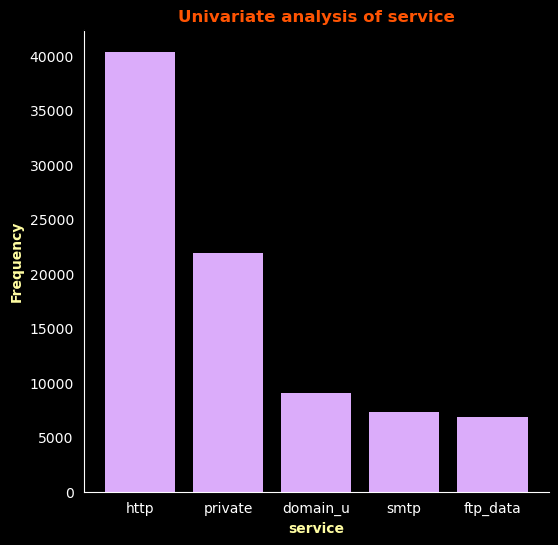

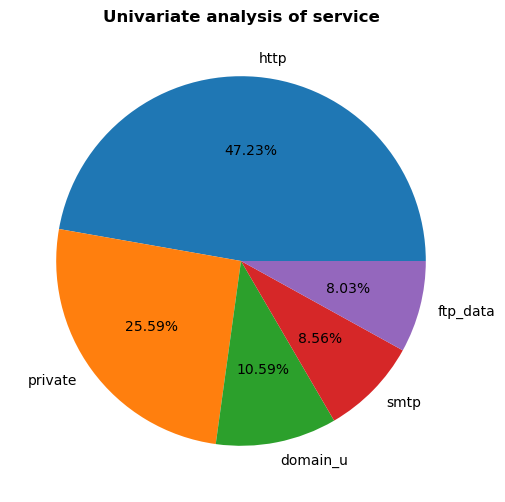

|        |   Frequency |
|:-------|------------:|
| SF     |       74945 |
| S0     |       34851 |
| REJ    |       11233 |
| RSTR   |        2421 |
| RSTO   |        1562 |
| S1     |         365 |
| SH     |         271 |
| S2     |         127 |
| RSTOS0 |         103 |
| S3     |          49 |
| OTH    |          46 |

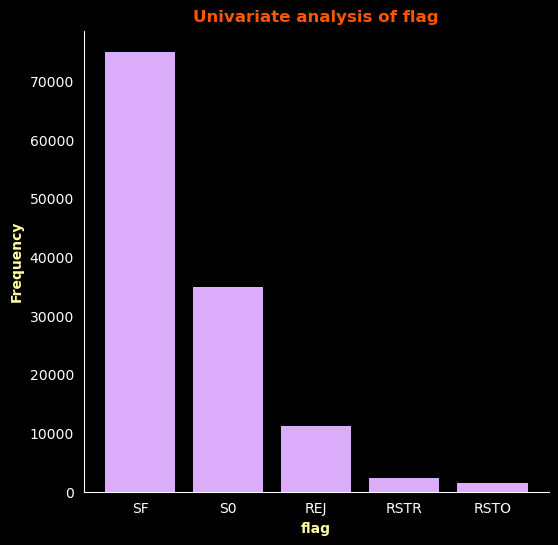

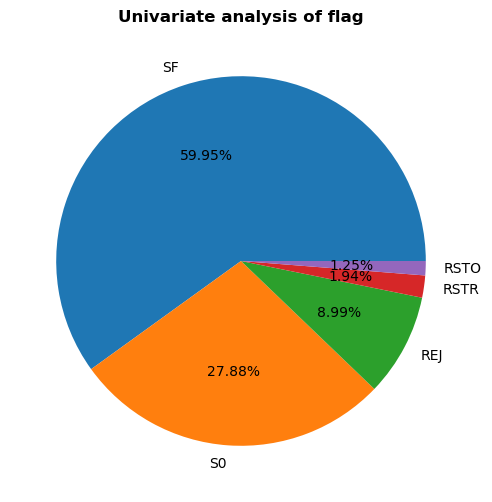

|       |        src_bytes |
|:------|-----------------:|
| count | 125973           |
| mean  |  45566.7         |
| std   |      5.87033e+06 |
| min   |      0           |
| 25%   |      0           |
| 50%   |     44           |
| 75%   |    276           |
| max   |      1.37996e+09 |

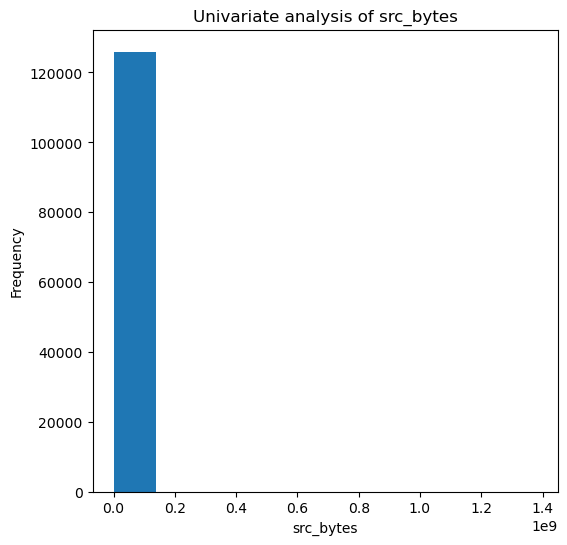

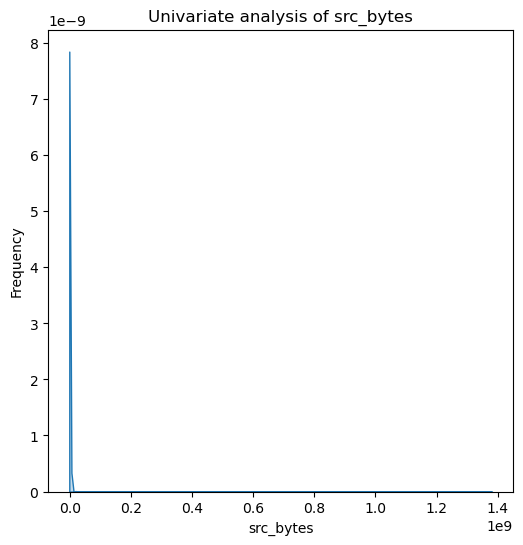

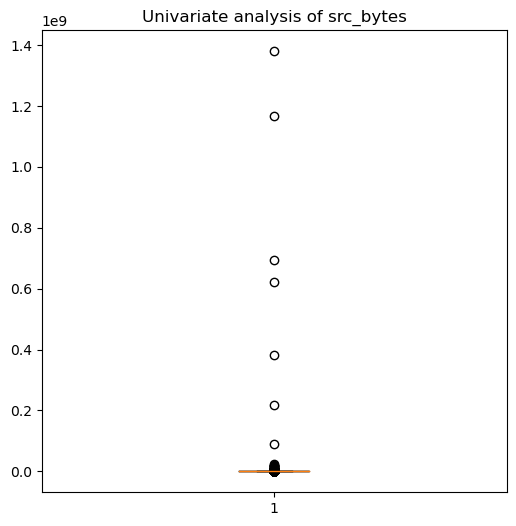

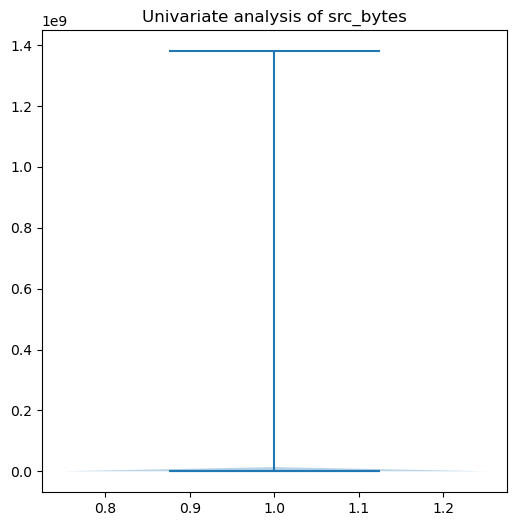

|       |        dst_bytes |
|:------|-----------------:|
| count | 125973           |
| mean  |  19779.1         |
| std   |      4.02127e+06 |
| min   |      0           |
| 25%   |      0           |
| 50%   |      0           |
| 75%   |    516           |
| max   |      1.30994e+09 |

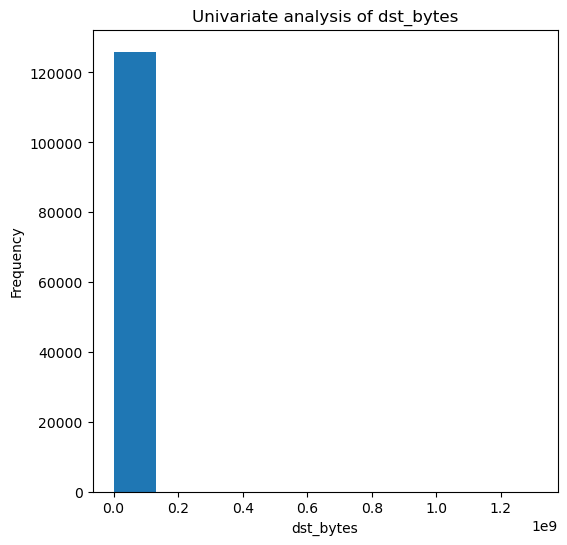

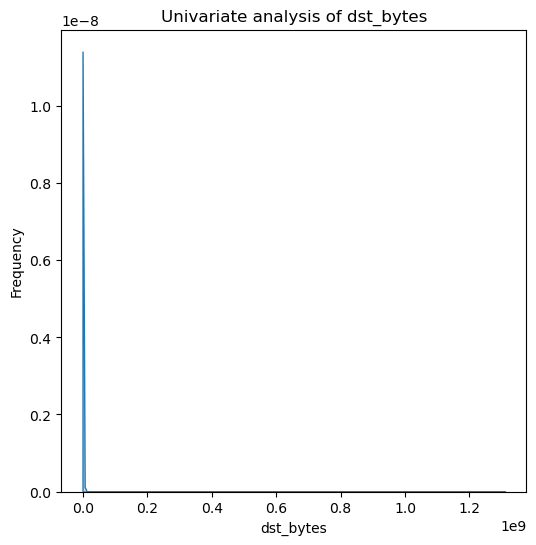

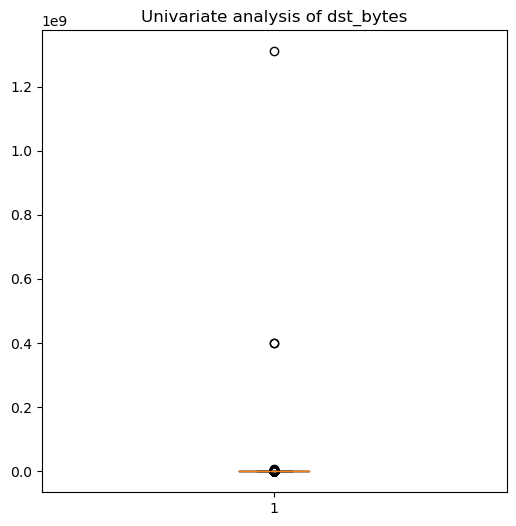

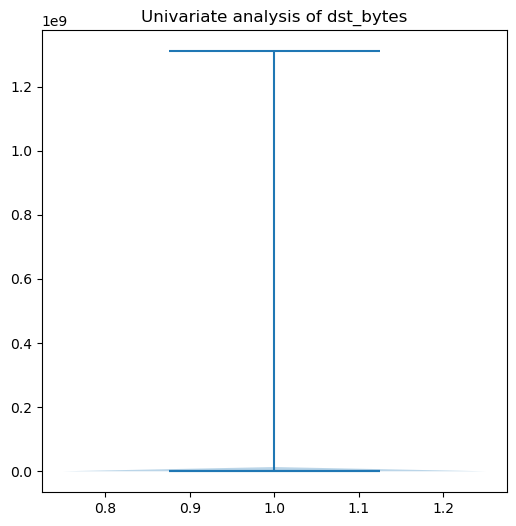

|    |   Frequency |
|---:|------------:|
|  0 |      125948 |
|  1 |          25 |

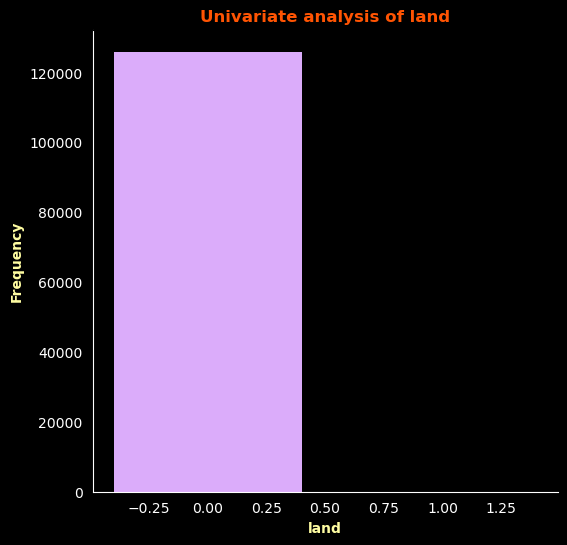

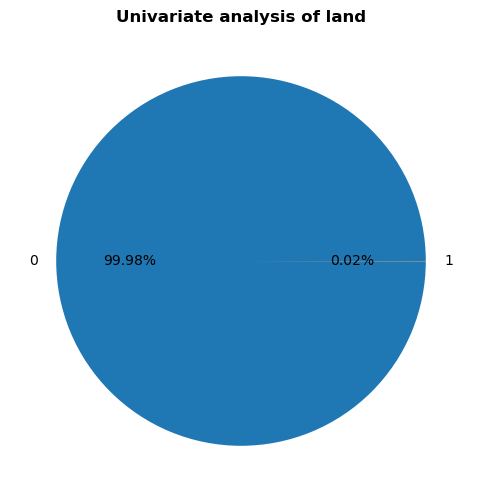

|       |   wrong_fragment |
|:------|-----------------:|
| count |   125973         |
| mean  |        0.0226874 |
| std   |        0.25353   |
| min   |        0         |
| 25%   |        0         |
| 50%   |        0         |
| 75%   |        0         |
| max   |        3         |

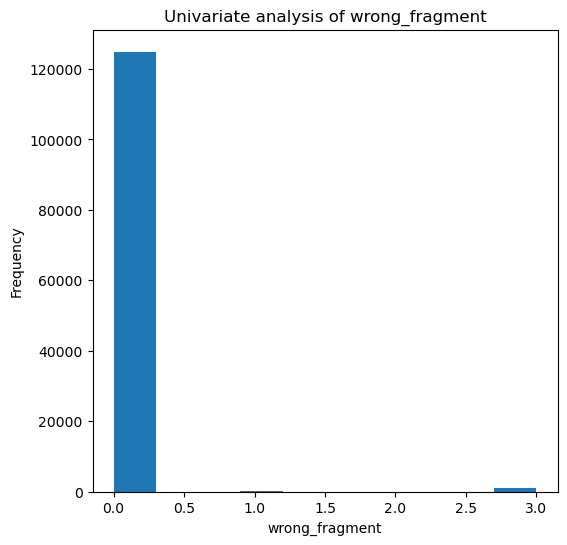

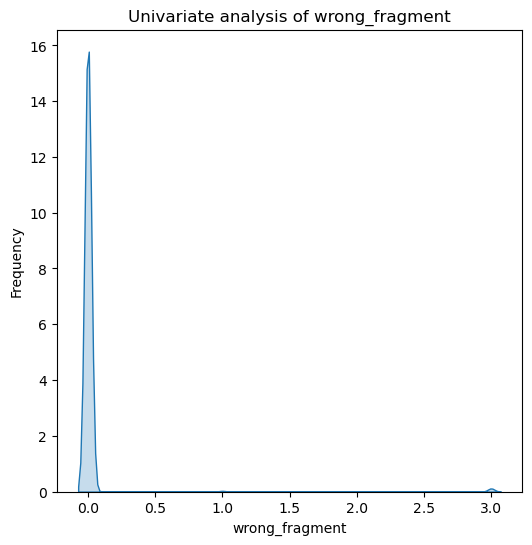

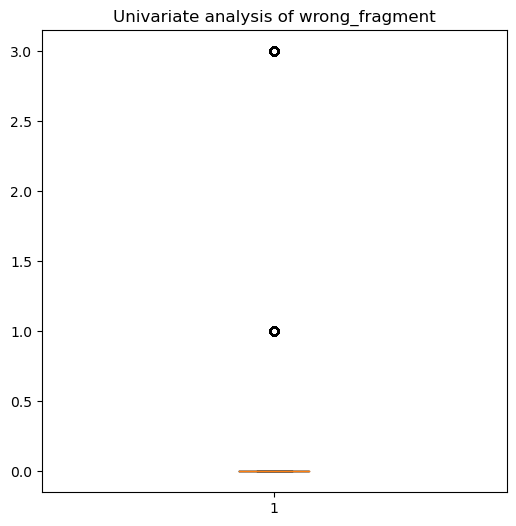

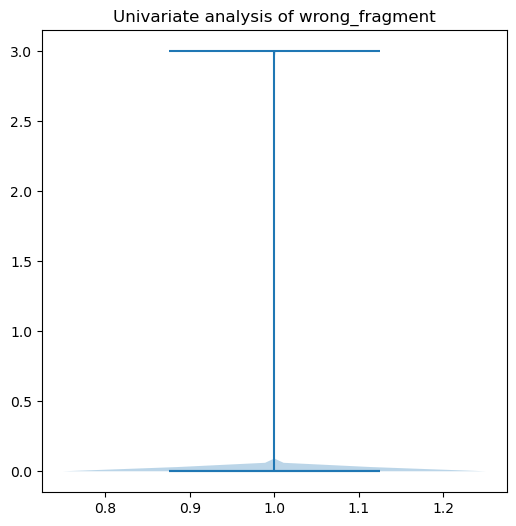

|       |           urgent |
|:------|-----------------:|
| count | 125973           |
| mean  |      0.000111135 |
| std   |      0.014366    |
| min   |      0           |
| 25%   |      0           |
| 50%   |      0           |
| 75%   |      0           |
| max   |      3           |

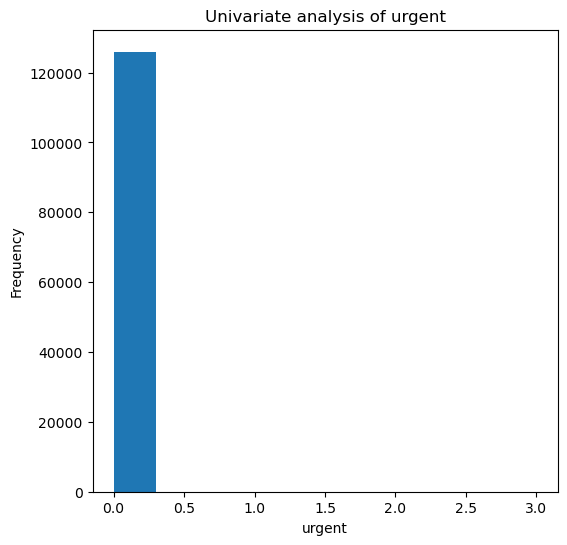

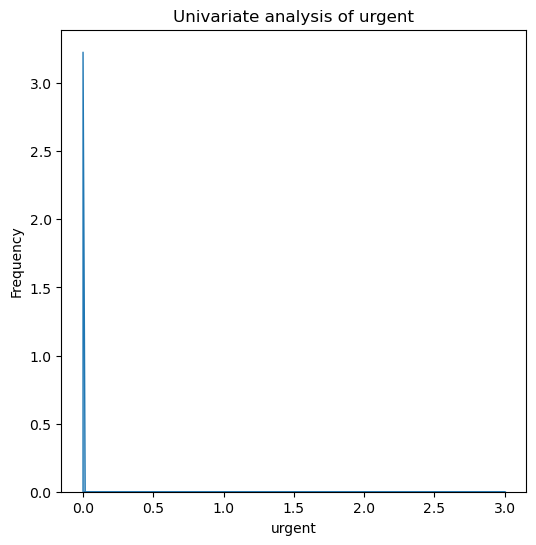

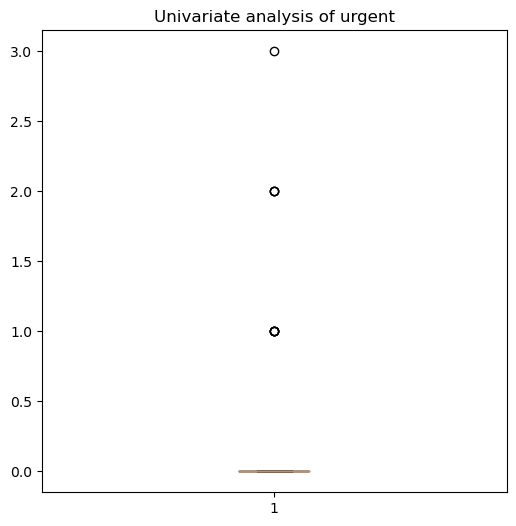

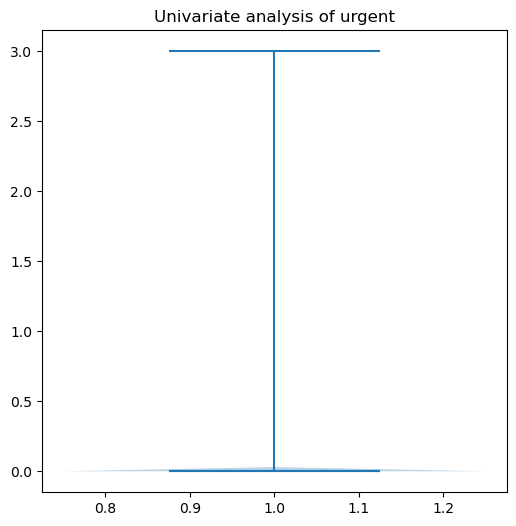

|       |           hot |
|:------|--------------:|
| count | 125973        |
| mean  |      0.204409 |
| std   |      2.14997  |
| min   |      0        |
| 25%   |      0        |
| 50%   |      0        |
| 75%   |      0        |
| max   |     77        |

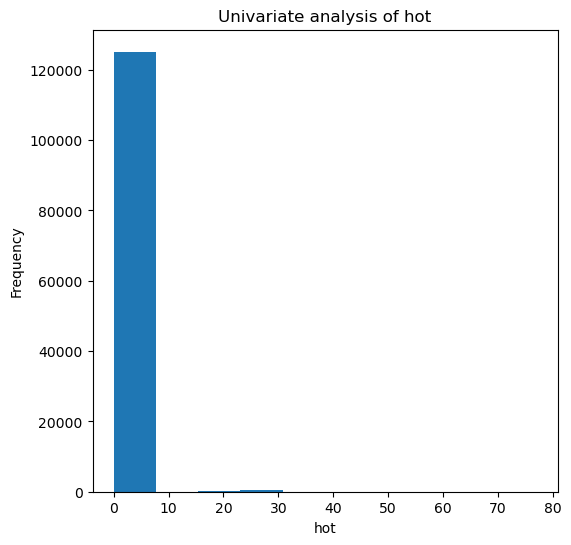

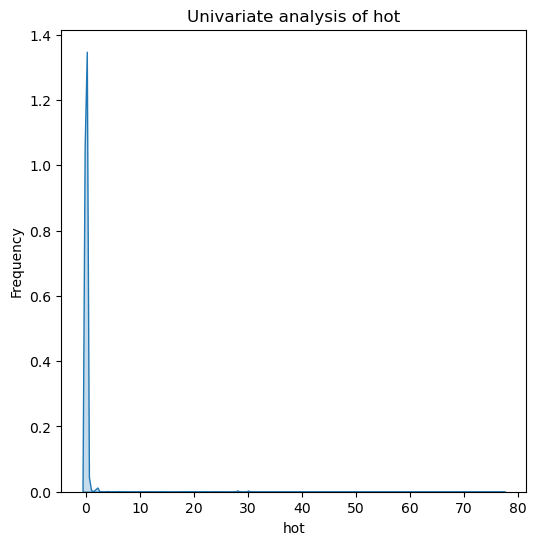

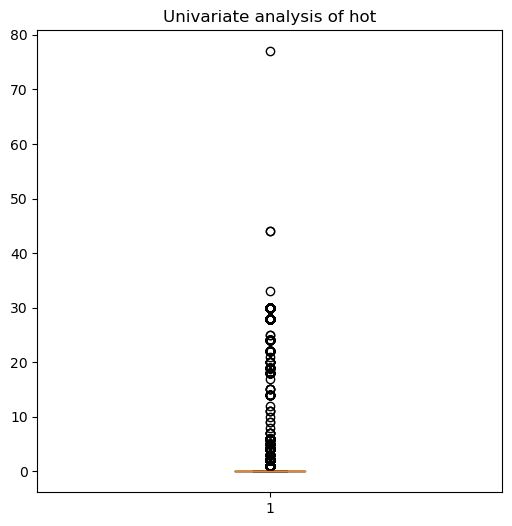

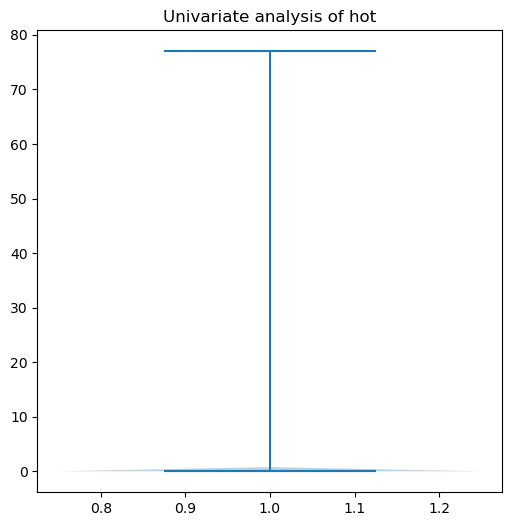

|       |   num_failed_logins |
|:------|--------------------:|
| count |     125973          |
| mean  |          0.00122248 |
| std   |          0.0452391  |
| min   |          0          |
| 25%   |          0          |
| 50%   |          0          |
| 75%   |          0          |
| max   |          5          |

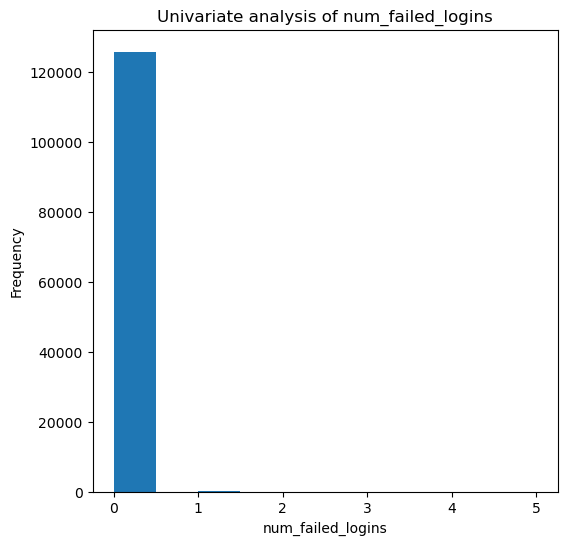

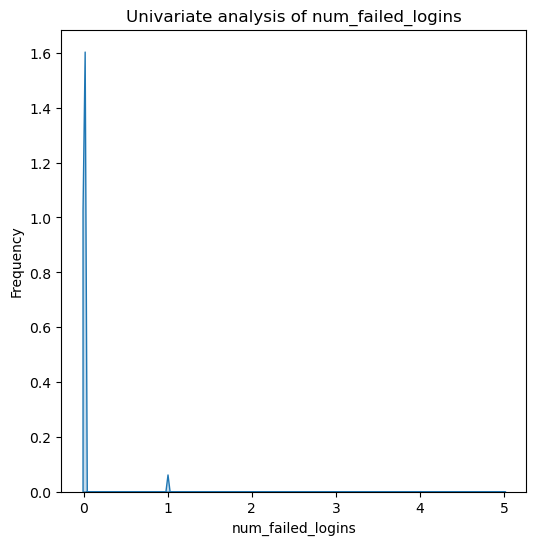

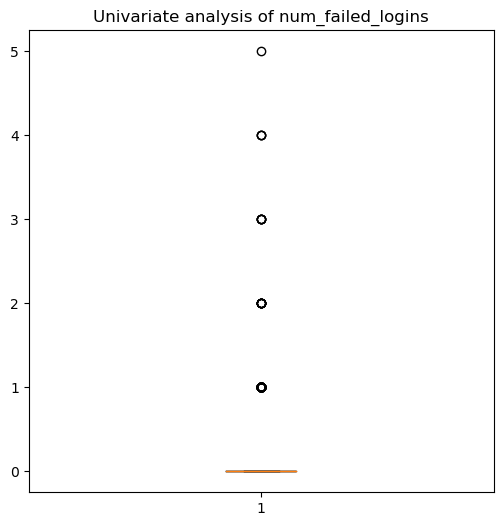

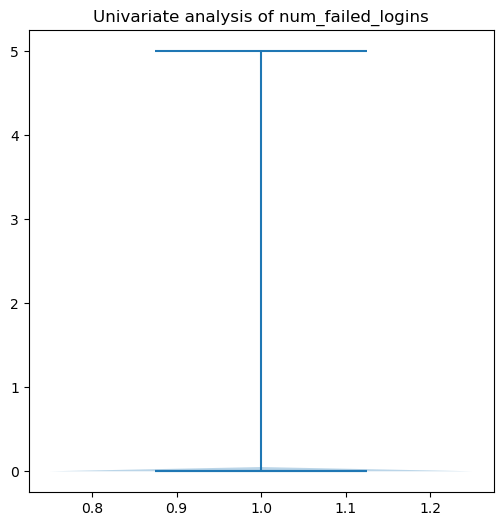

|    |   Frequency |
|---:|------------:|
|  0 |       76121 |
|  1 |       49852 |

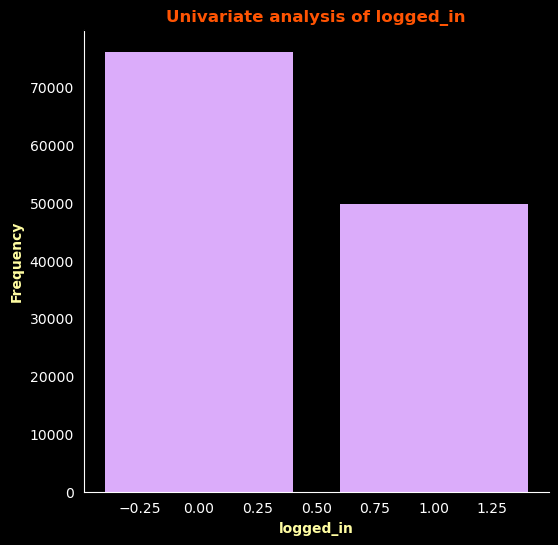

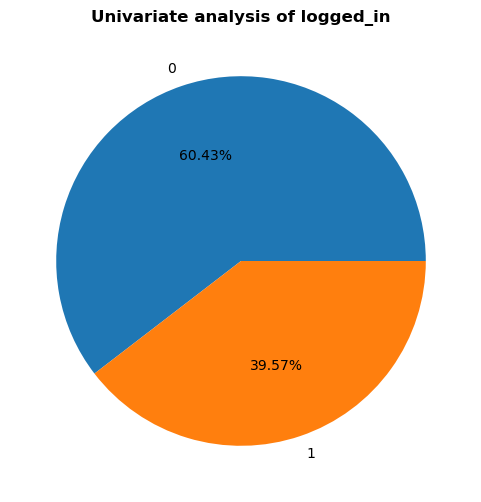

|       |   num_compromised |
|:------|------------------:|
| count |      125973       |
| mean  |           0.27925 |
| std   |          23.942   |
| min   |           0       |
| 25%   |           0       |
| 50%   |           0       |
| 75%   |           0       |
| max   |        7479       |

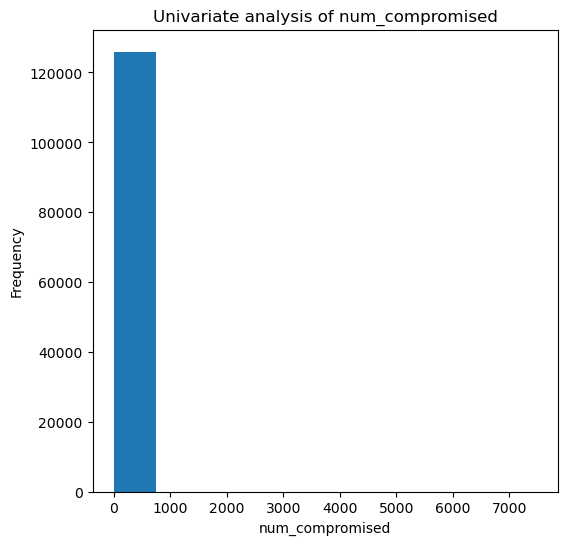

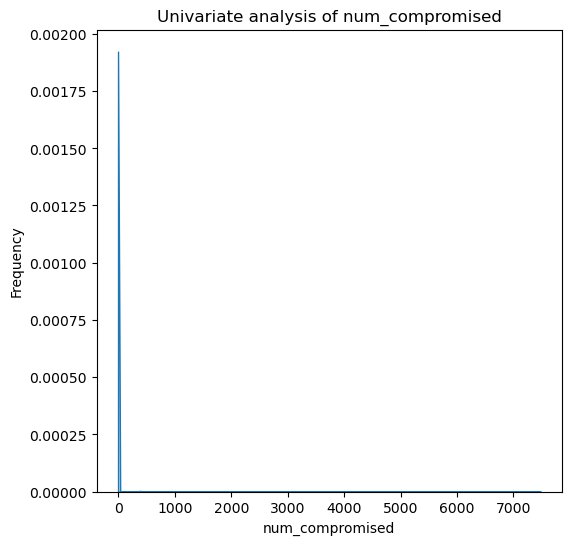

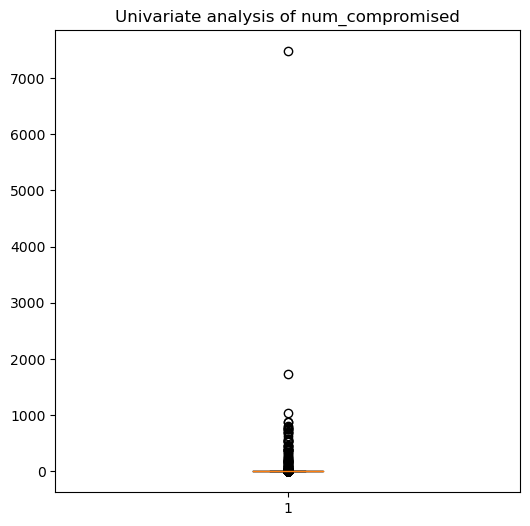

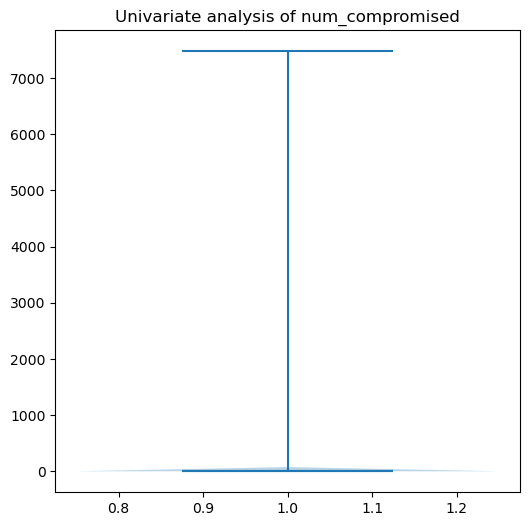

|    |   Frequency |
|---:|------------:|
|  0 |      125804 |
|  1 |         169 |

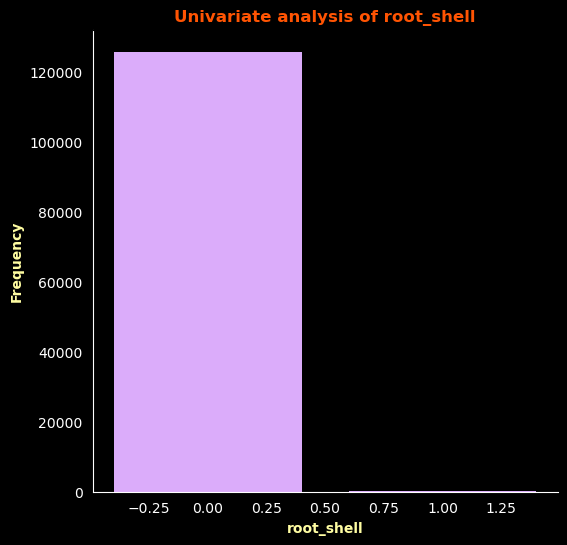

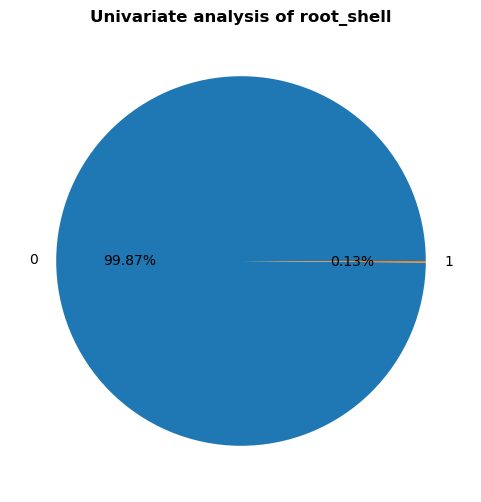

|       |    su_attempted |
|:------|----------------:|
| count | 125973          |
| mean  |      0.00110341 |
| std   |      0.0451544  |
| min   |      0          |
| 25%   |      0          |
| 50%   |      0          |
| 75%   |      0          |
| max   |      2          |

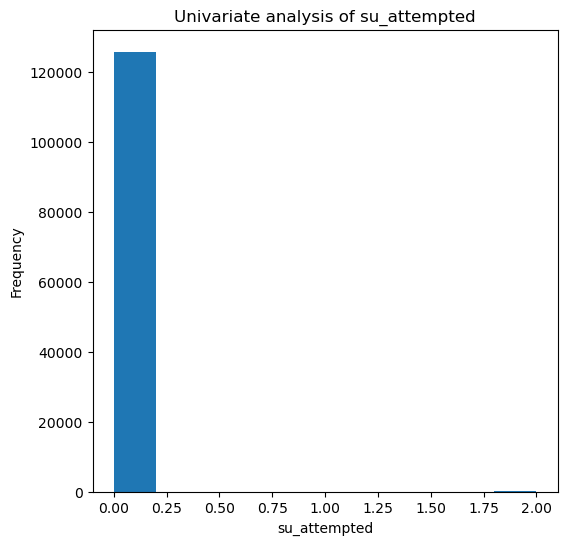

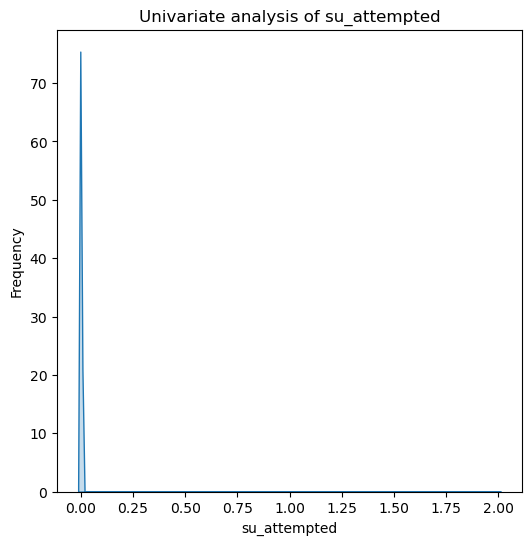

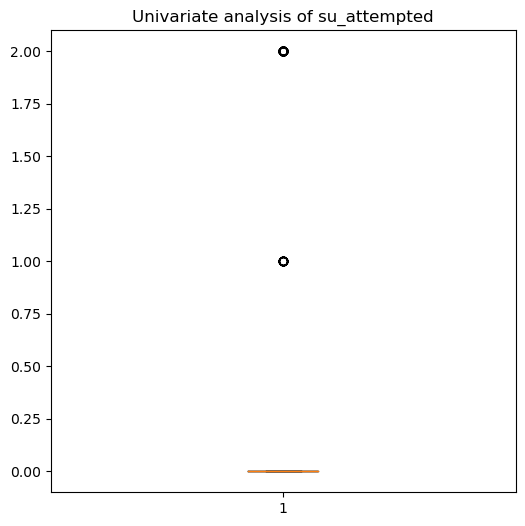

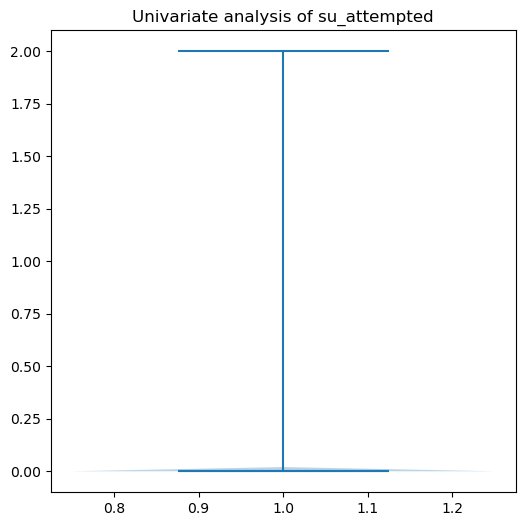

|       |      num_root |
|:------|--------------:|
| count | 125973        |
| mean  |      0.302192 |
| std   |     24.3996   |
| min   |      0        |
| 25%   |      0        |
| 50%   |      0        |
| 75%   |      0        |
| max   |   7468        |

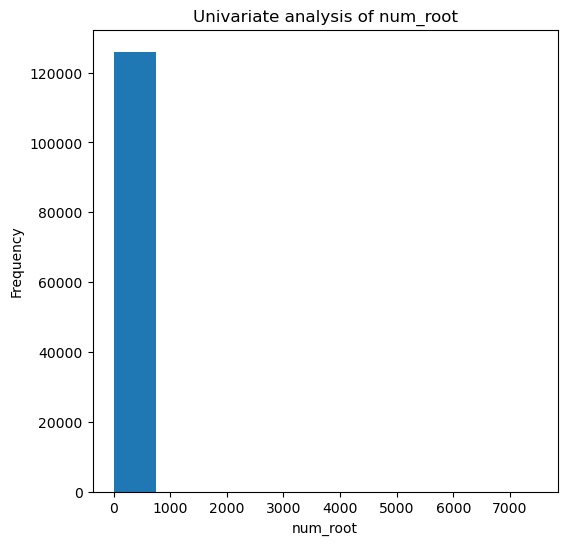

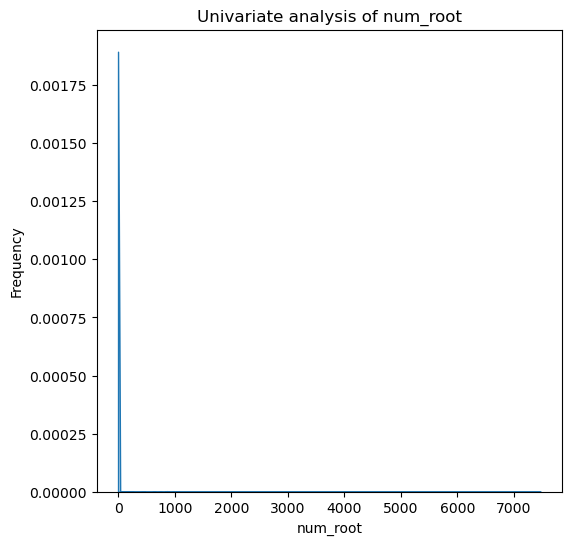

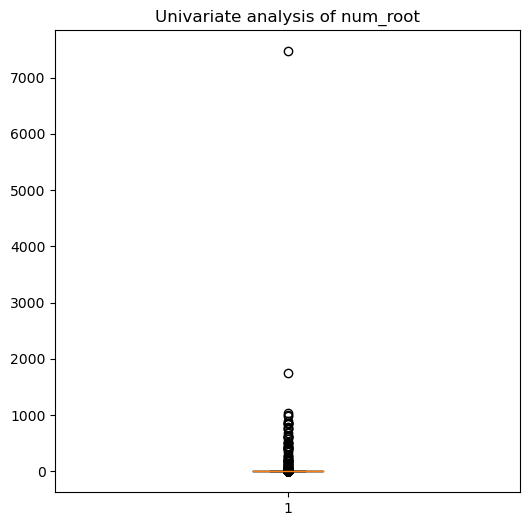

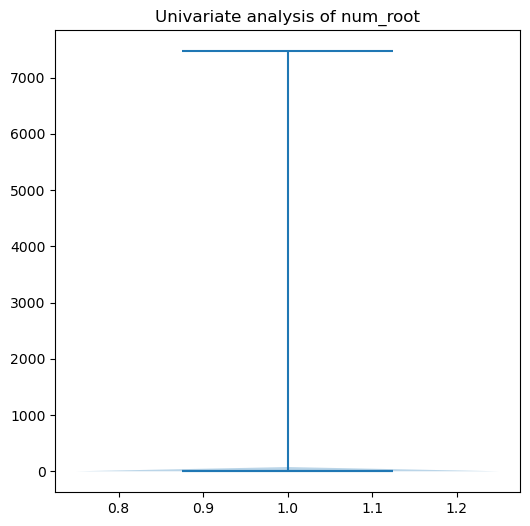

|       |   num_file_creations |
|:------|---------------------:|
| count |       125973         |
| mean  |            0.0126694 |
| std   |            0.483935  |
| min   |            0         |
| 25%   |            0         |
| 50%   |            0         |
| 75%   |            0         |
| max   |           43         |

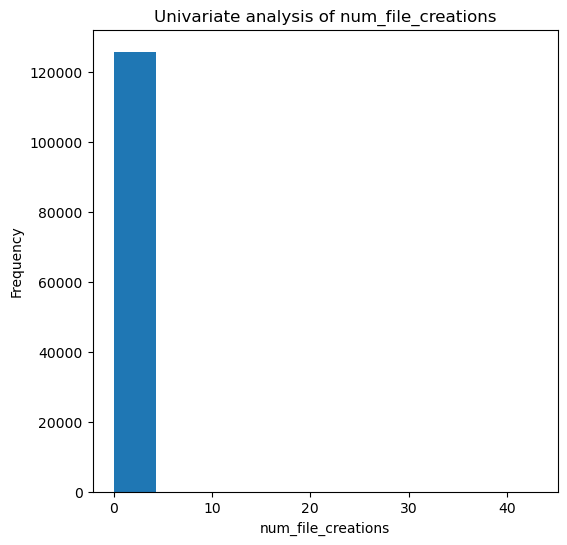

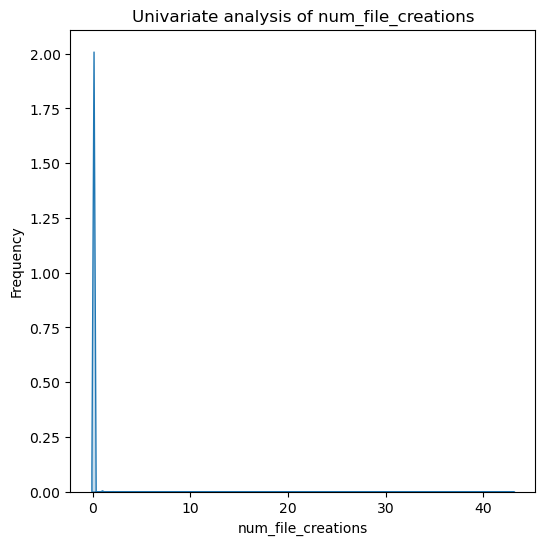

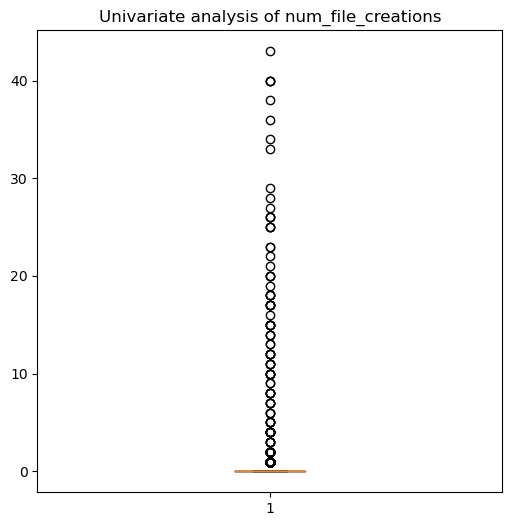

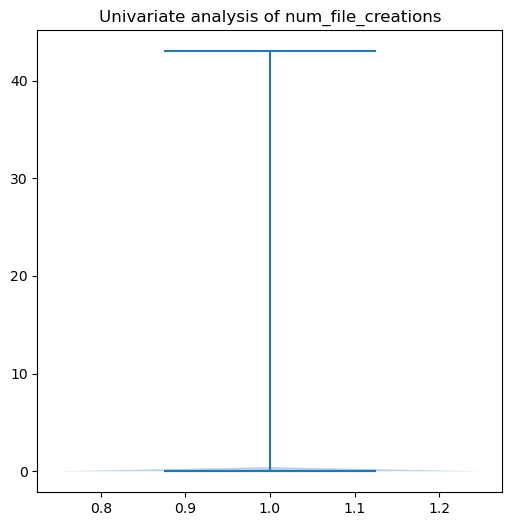

|       |       num_shells |
|:------|-----------------:|
| count | 125973           |
| mean  |      0.000412787 |
| std   |      0.0221811   |
| min   |      0           |
| 25%   |      0           |
| 50%   |      0           |
| 75%   |      0           |
| max   |      2           |

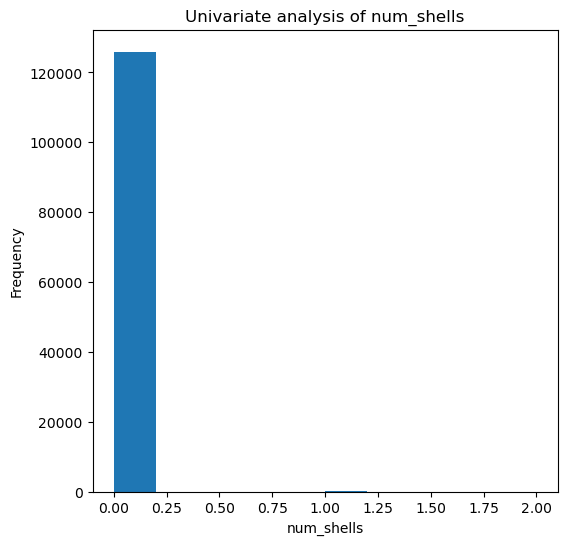

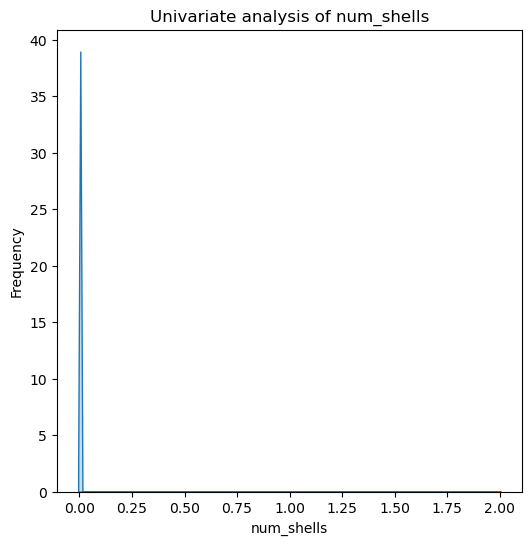

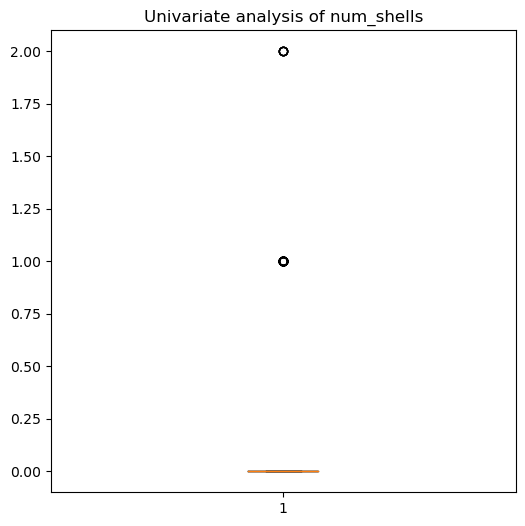

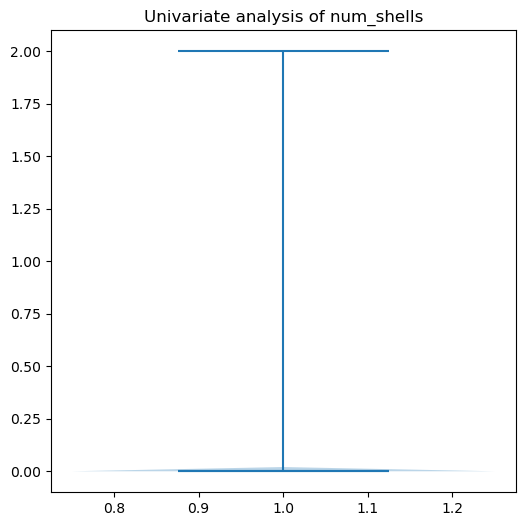

|       |   num_access_files |
|:------|-------------------:|
| count |    125973          |
| mean  |         0.00409612 |
| std   |         0.0993696  |
| min   |         0          |
| 25%   |         0          |
| 50%   |         0          |
| 75%   |         0          |
| max   |         9          |

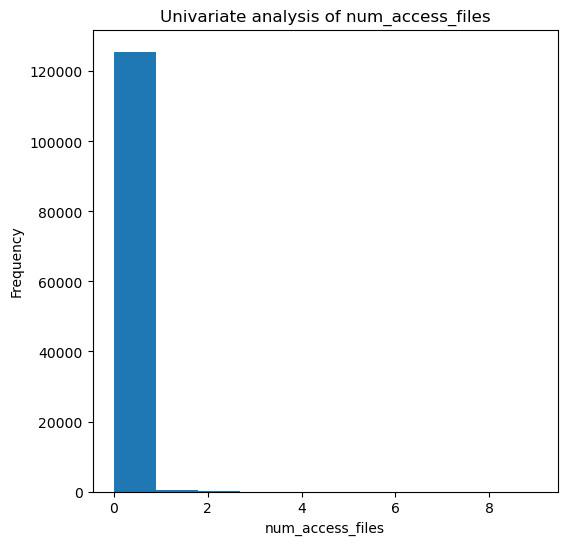

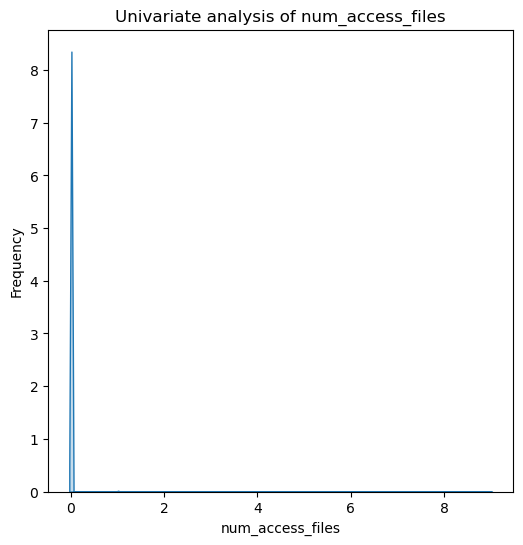

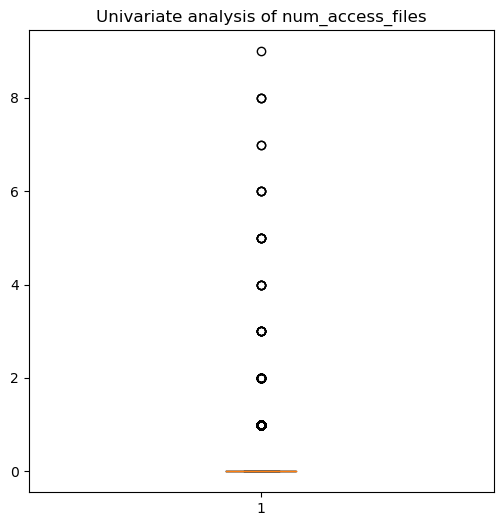

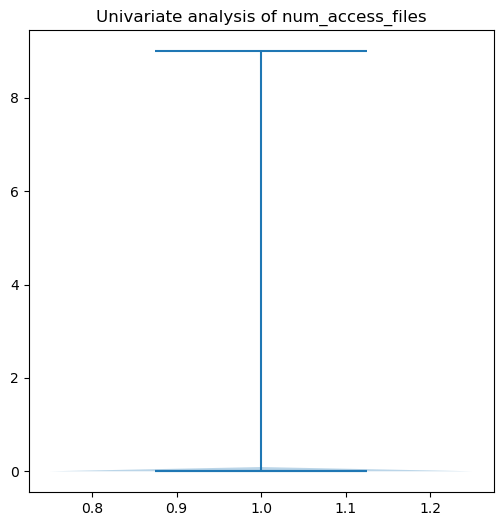

|       |   num_outbound_cmds |
|:------|--------------------:|
| count |              125973 |
| mean  |                   0 |
| std   |                   0 |
| min   |                   0 |
| 25%   |                   0 |
| 50%   |                   0 |
| 75%   |                   0 |
| max   |                   0 |

C:\Users\hp\AppData\Local\Temp\ipykernel_14288\2704150585.py:18: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = data,fill=True)


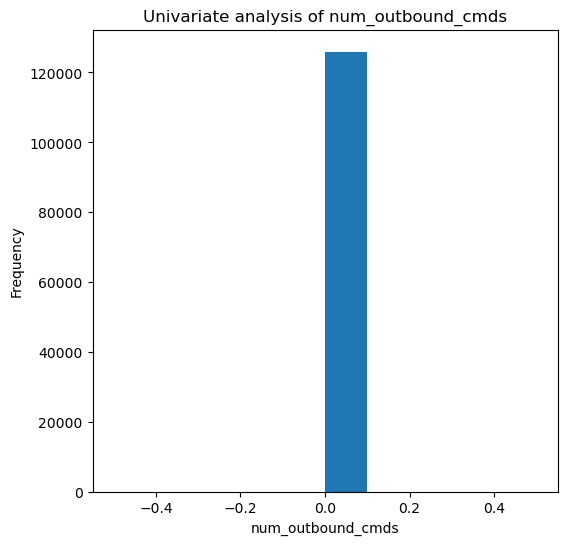

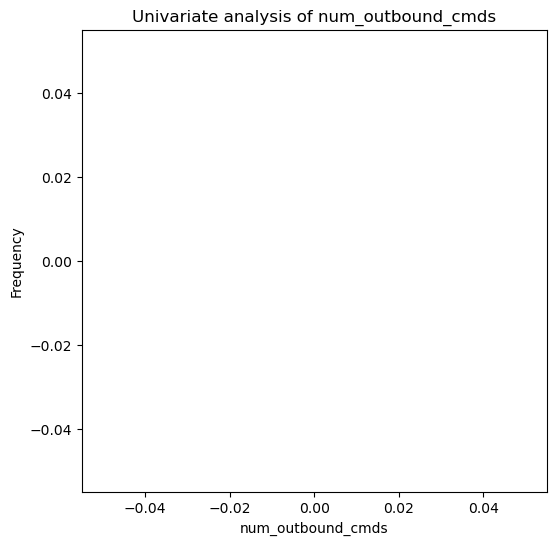

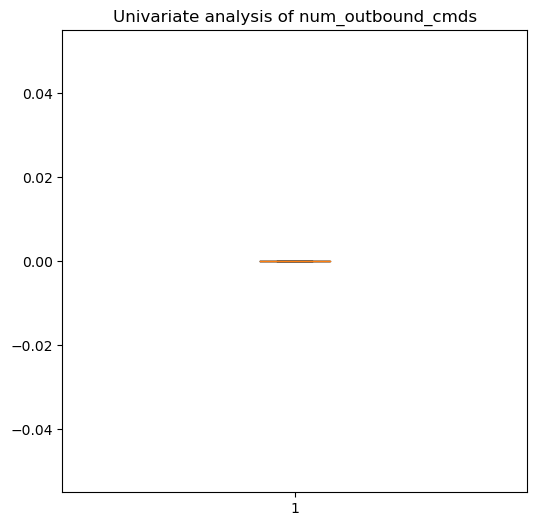

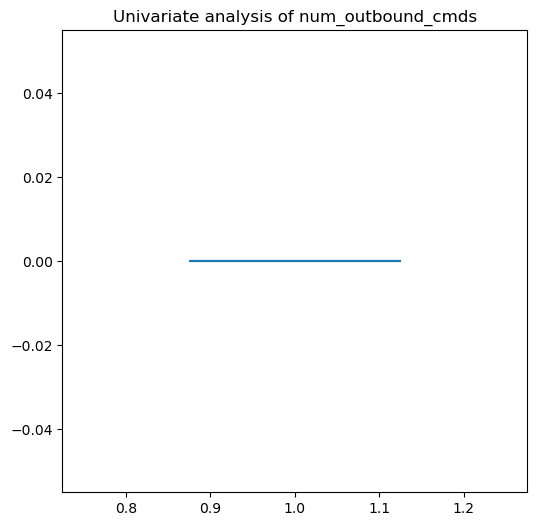

|    |   Frequency |
|---:|------------:|
|  0 |      125972 |
|  1 |           1 |

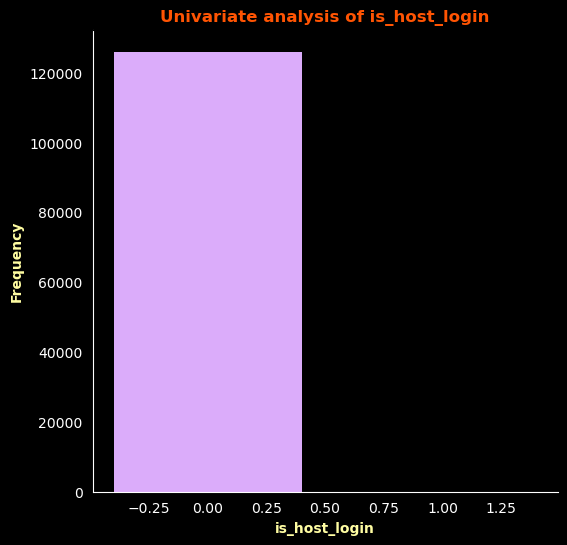

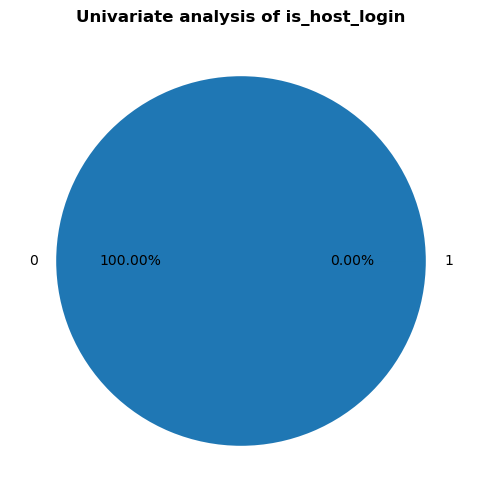

|    |   Frequency |
|---:|------------:|
|  0 |      124786 |
|  1 |        1187 |

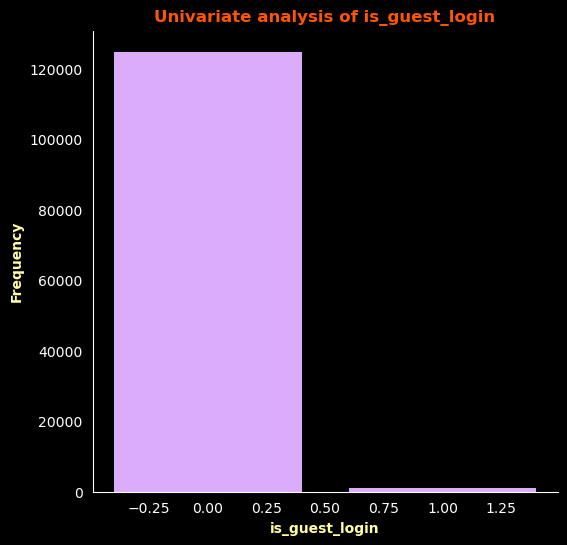

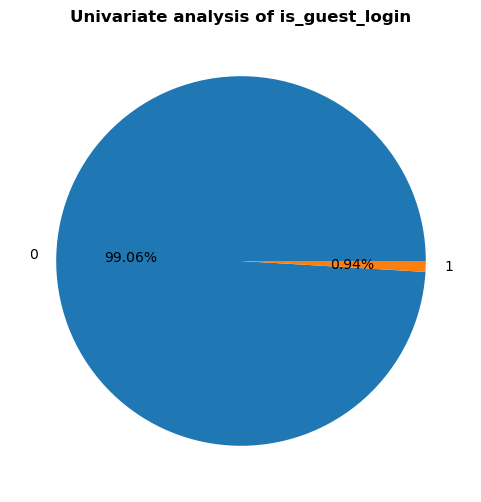

|       |       count |
|:------|------------:|
| count | 125973      |
| mean  |     84.1076 |
| std   |    114.509  |
| min   |      0      |
| 25%   |      2      |
| 50%   |     14      |
| 75%   |    143      |
| max   |    511      |

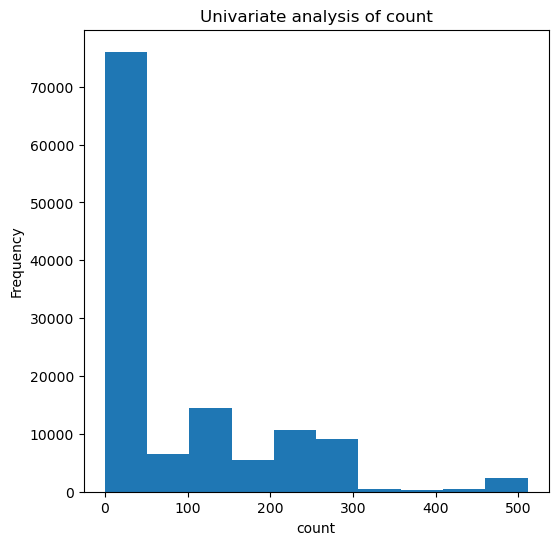

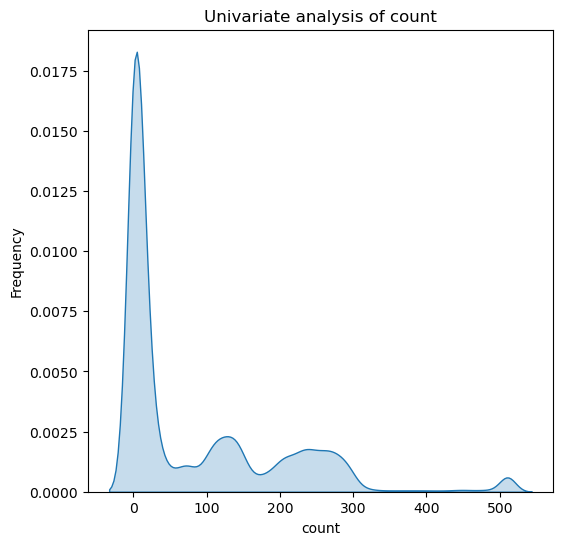

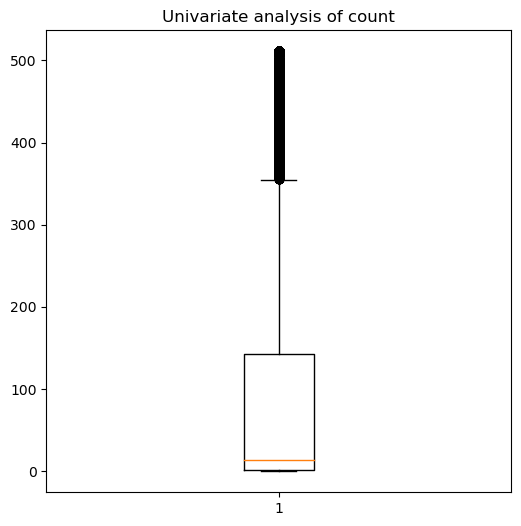

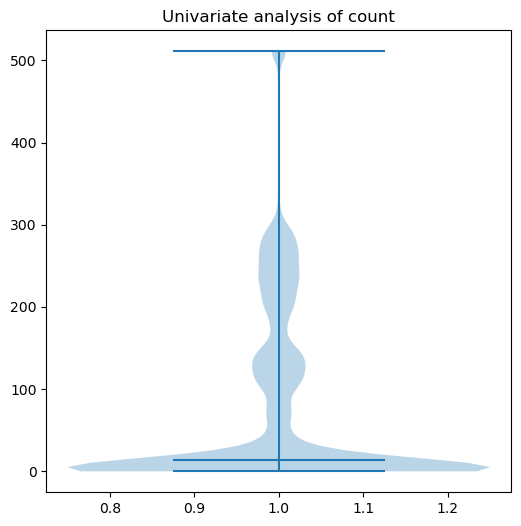

|       |   srv_count |
|:------|------------:|
| count | 125973      |
| mean  |     27.7379 |
| std   |     72.6358 |
| min   |      0      |
| 25%   |      2      |
| 50%   |      8      |
| 75%   |     18      |
| max   |    511      |

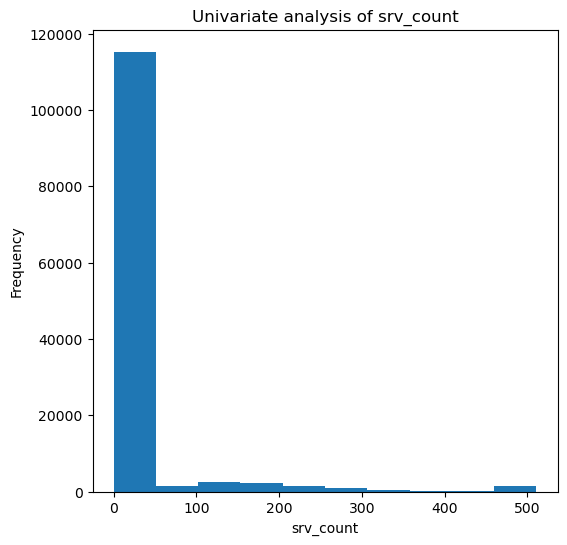

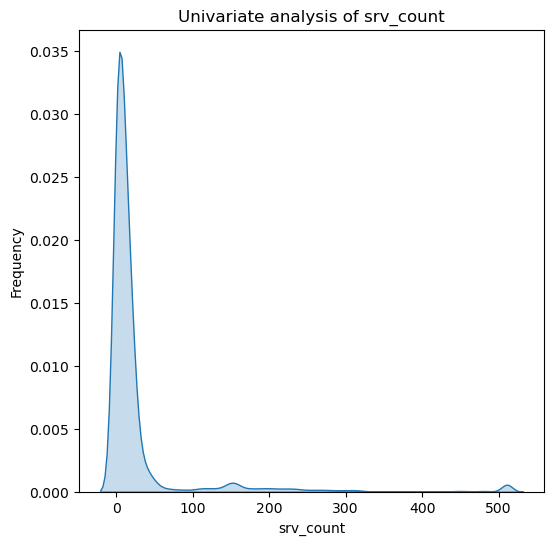

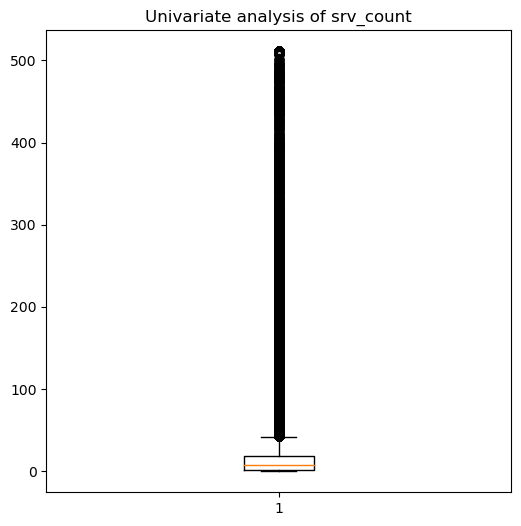

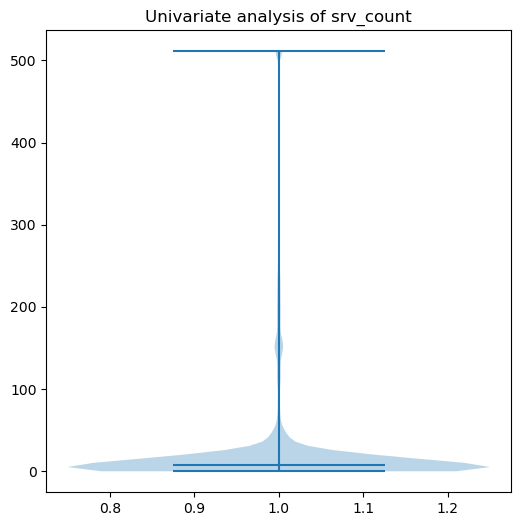

|       |   serror_rate |
|:------|--------------:|
| count | 125973        |
| mean  |      0.284485 |
| std   |      0.446456 |
| min   |      0        |
| 25%   |      0        |
| 50%   |      0        |
| 75%   |      1        |
| max   |      1        |

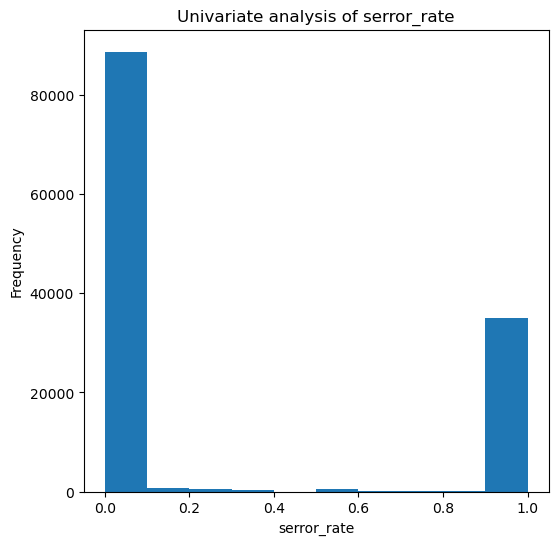

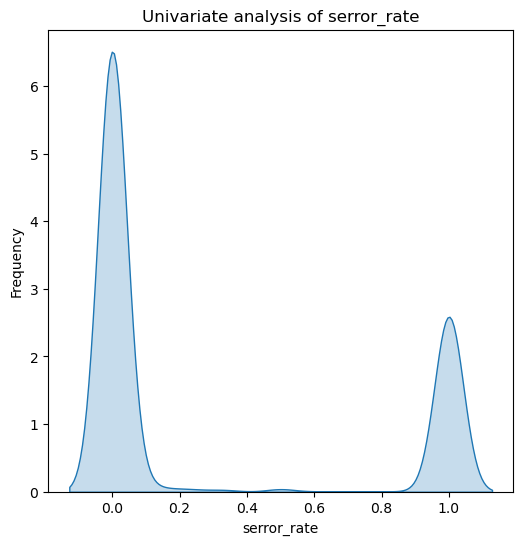

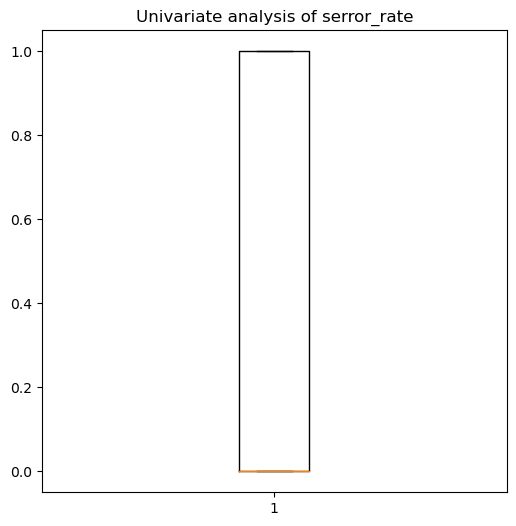

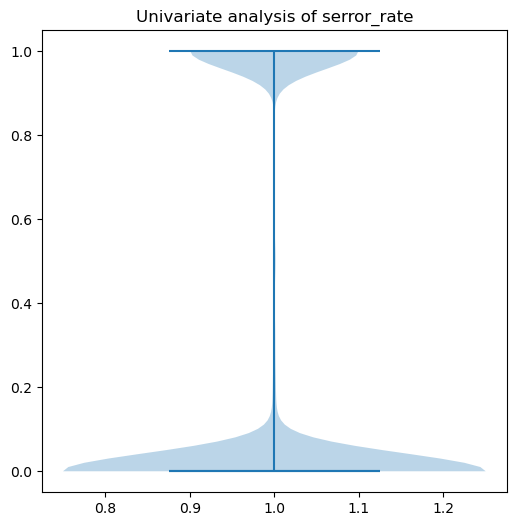

|       |   srv_serror_rate |
|:------|------------------:|
| count |     125973        |
| mean  |          0.282485 |
| std   |          0.447022 |
| min   |          0        |
| 25%   |          0        |
| 50%   |          0        |
| 75%   |          1        |
| max   |          1        |

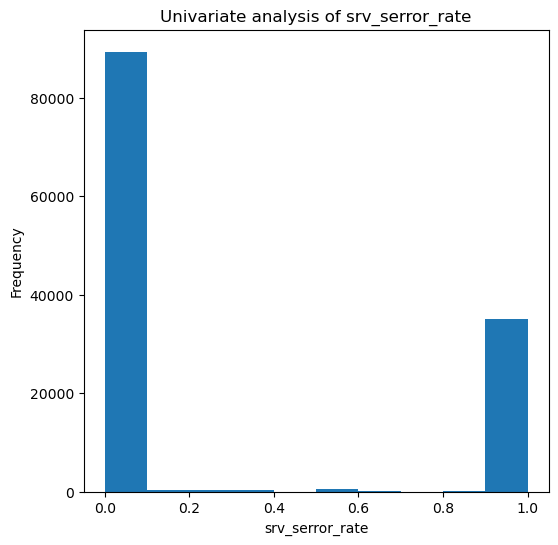

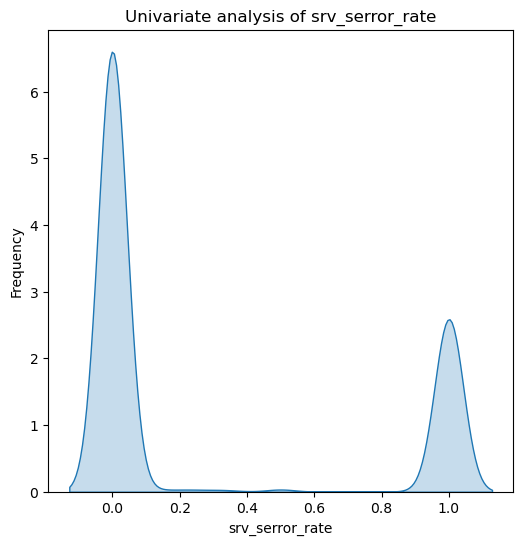

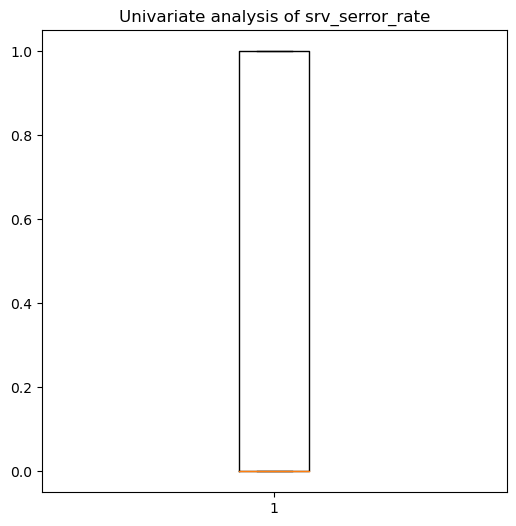

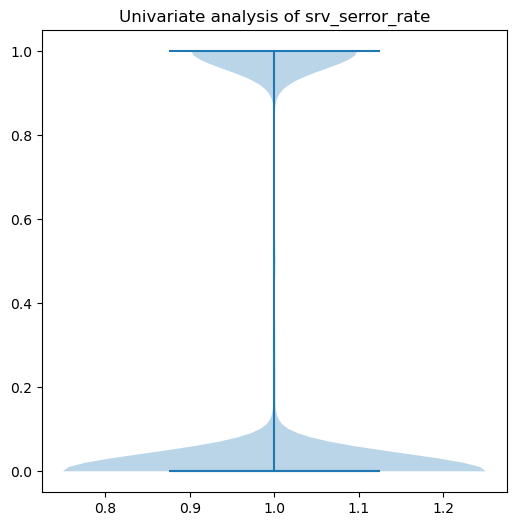

|       |   rerror_rate |
|:------|--------------:|
| count | 125973        |
| mean  |      0.119958 |
| std   |      0.320436 |
| min   |      0        |
| 25%   |      0        |
| 50%   |      0        |
| 75%   |      0        |
| max   |      1        |

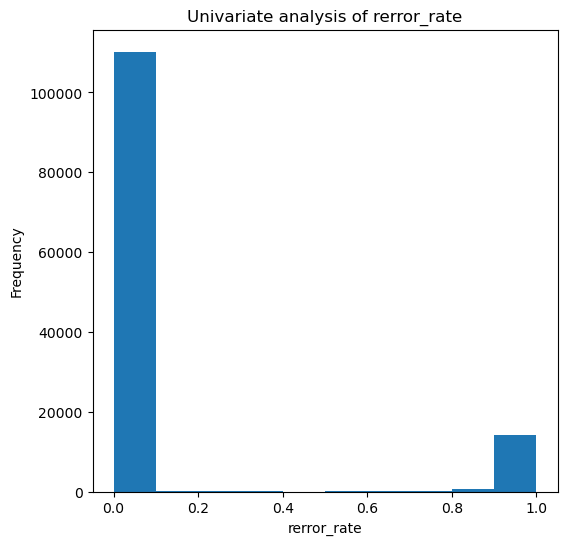

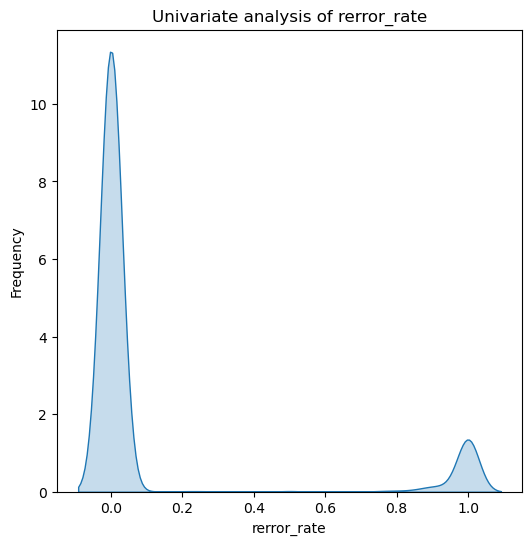

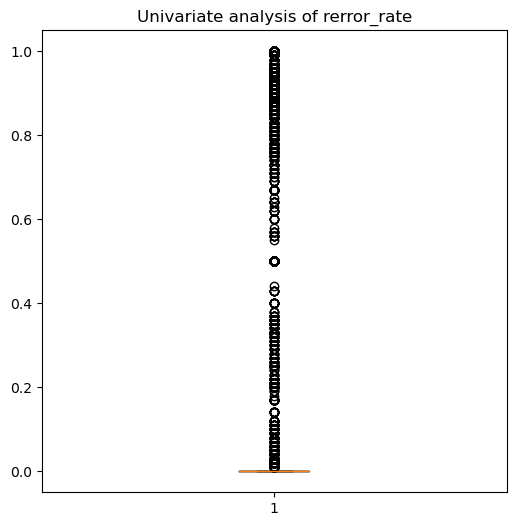

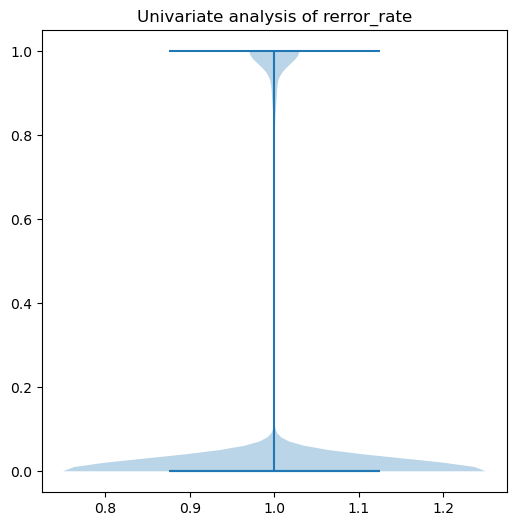

|       |   srv_rerror_rate |
|:------|------------------:|
| count |     125973        |
| mean  |          0.121183 |
| std   |          0.323647 |
| min   |          0        |
| 25%   |          0        |
| 50%   |          0        |
| 75%   |          0        |
| max   |          1        |

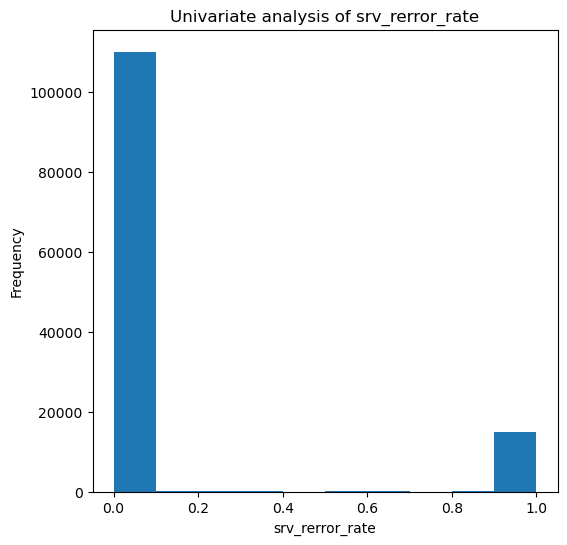

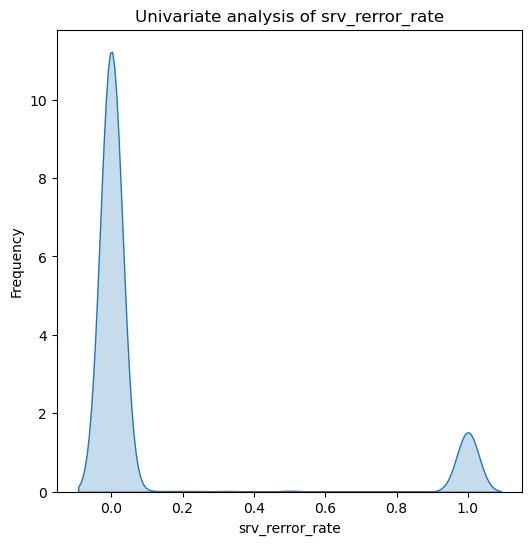

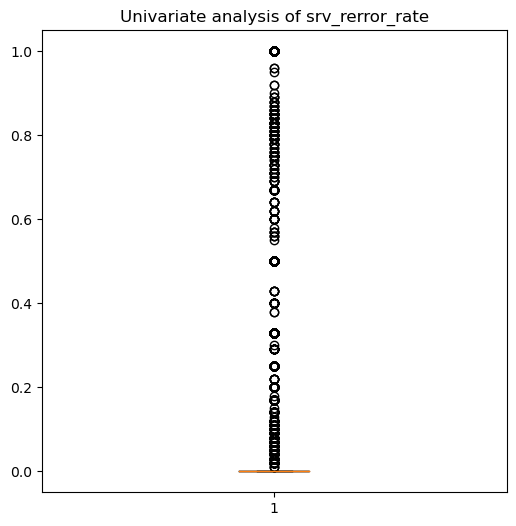

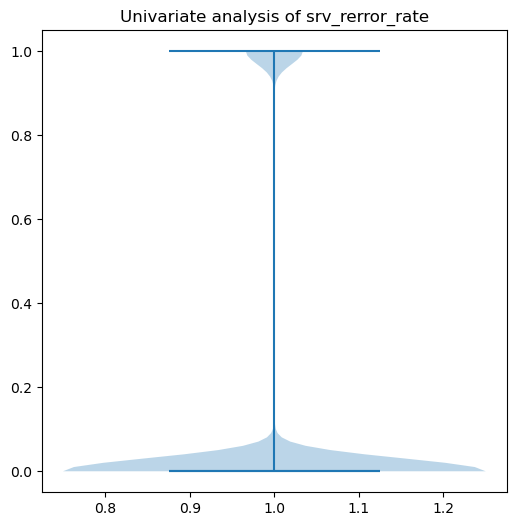

|       |   same_srv_rate |
|:------|----------------:|
| count |   125973        |
| mean  |        0.660928 |
| std   |        0.439623 |
| min   |        0        |
| 25%   |        0.09     |
| 50%   |        1        |
| 75%   |        1        |
| max   |        1        |

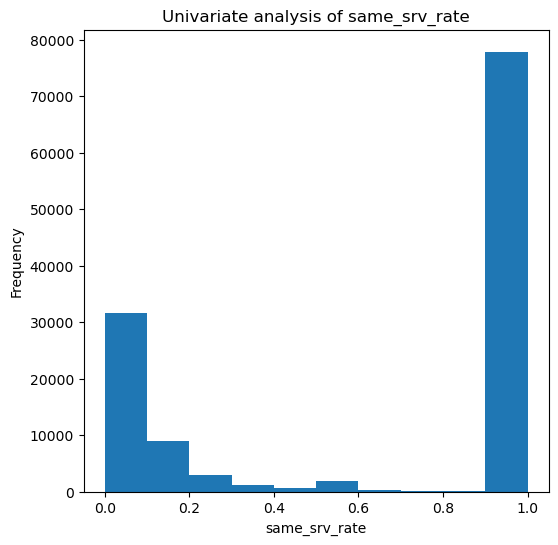

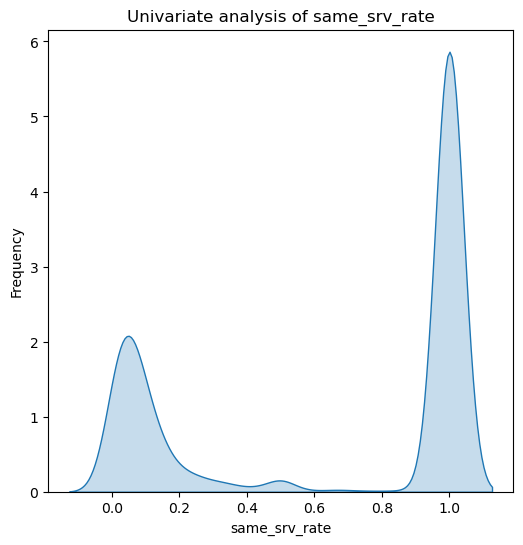

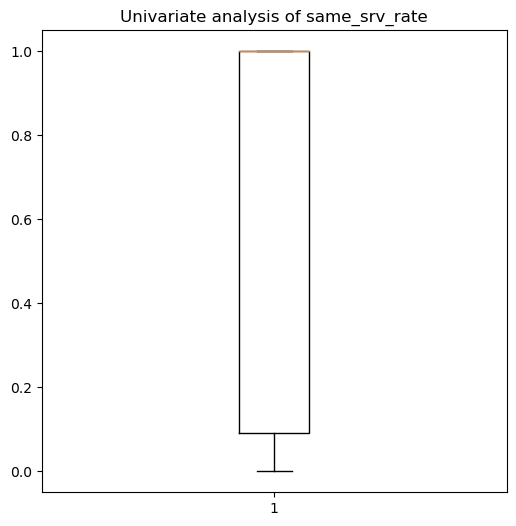

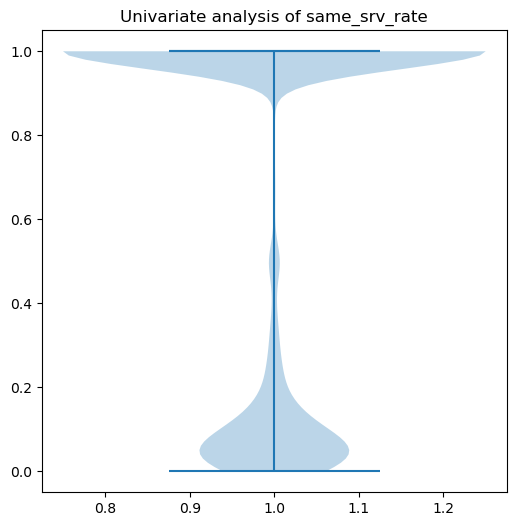

|       |   diff_srv_rate |
|:------|----------------:|
| count |  125973         |
| mean  |       0.0630526 |
| std   |       0.180314  |
| min   |       0         |
| 25%   |       0         |
| 50%   |       0         |
| 75%   |       0.06      |
| max   |       1         |

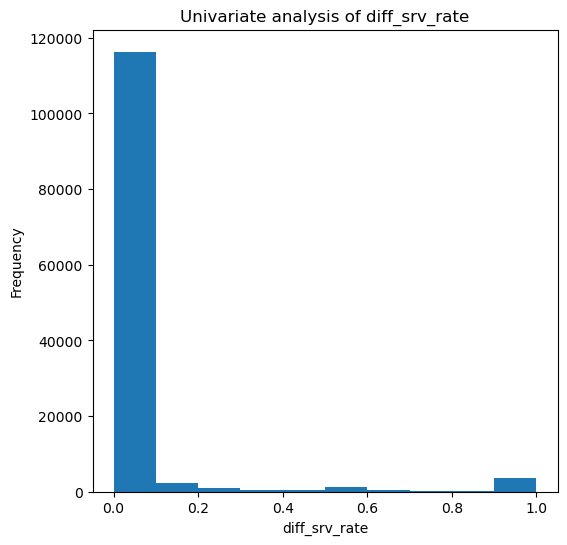

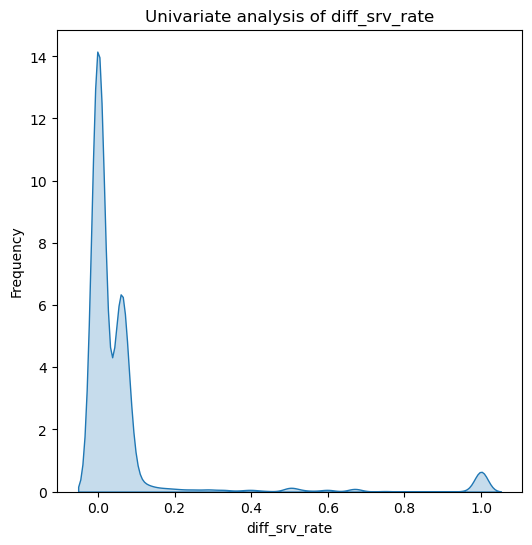

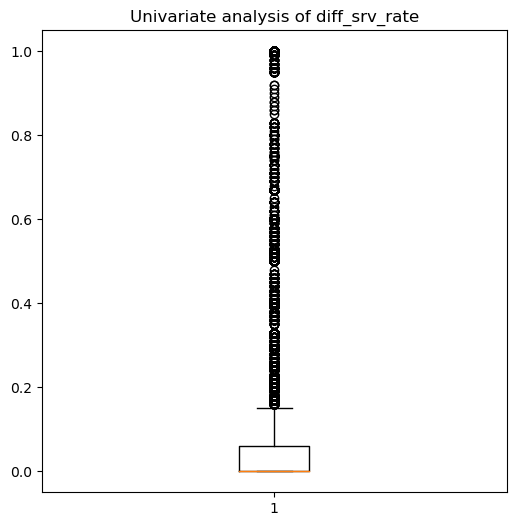

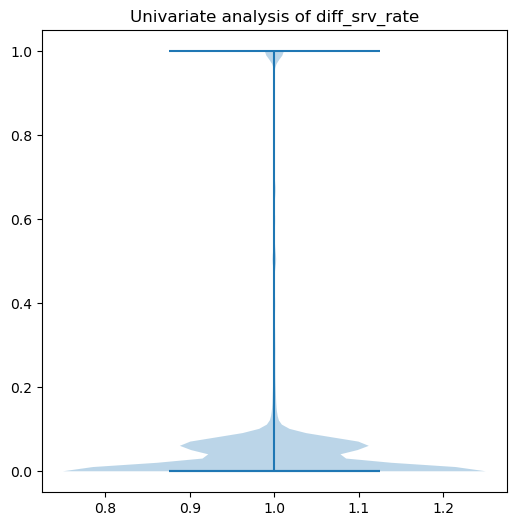

|       |   srv_diff_host_rate |
|:------|---------------------:|
| count |       125973         |
| mean  |            0.0973216 |
| std   |            0.25983   |
| min   |            0         |
| 25%   |            0         |
| 50%   |            0         |
| 75%   |            0         |
| max   |            1         |

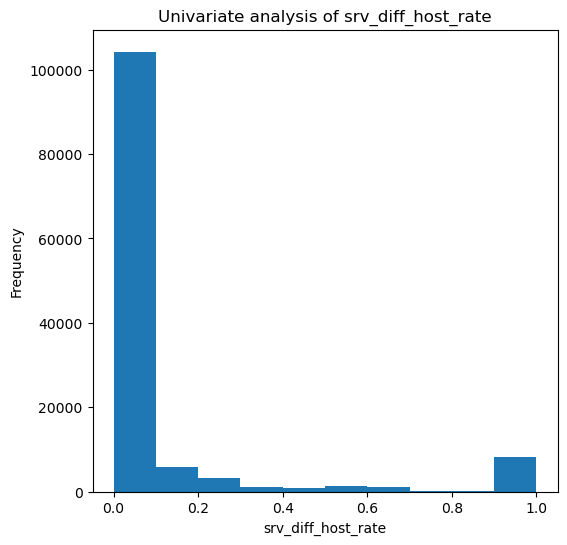

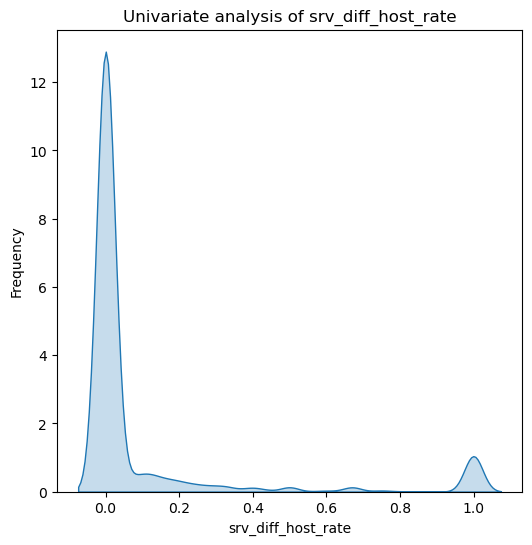

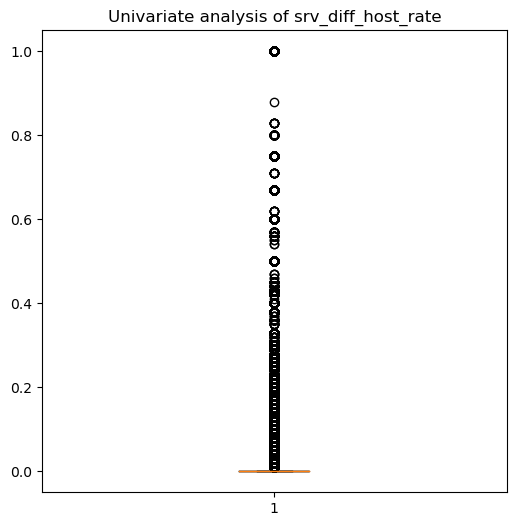

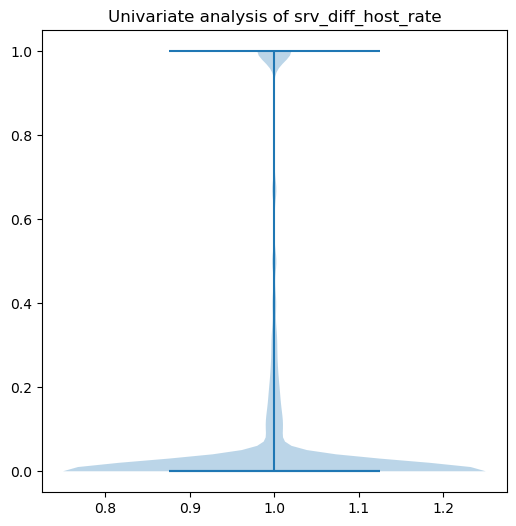

|       |   dst_host_count |
|:------|-----------------:|
| count |      125973      |
| mean  |         182.149  |
| std   |          99.2062 |
| min   |           0      |
| 25%   |          82      |
| 50%   |         255      |
| 75%   |         255      |
| max   |         255      |

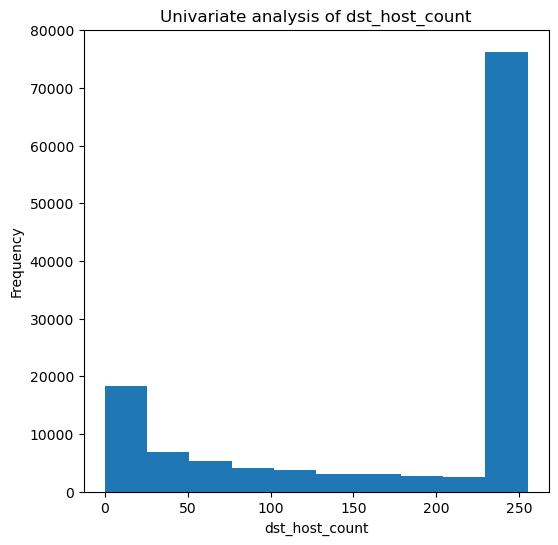

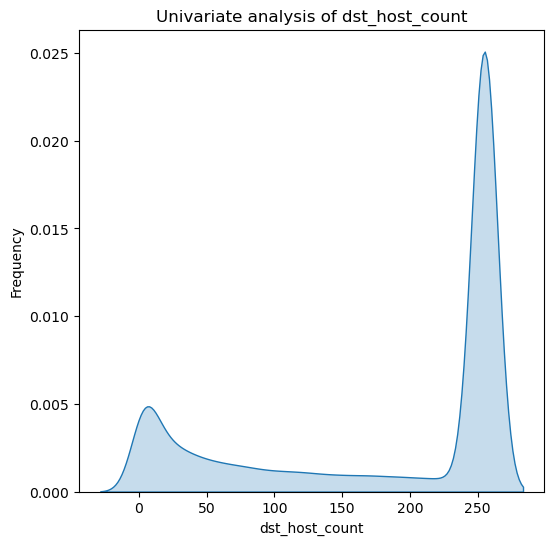

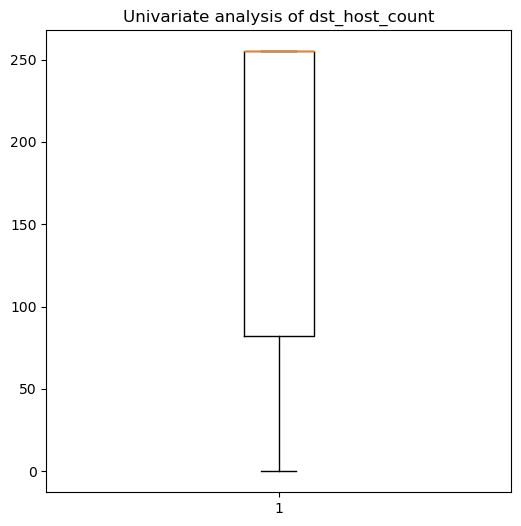

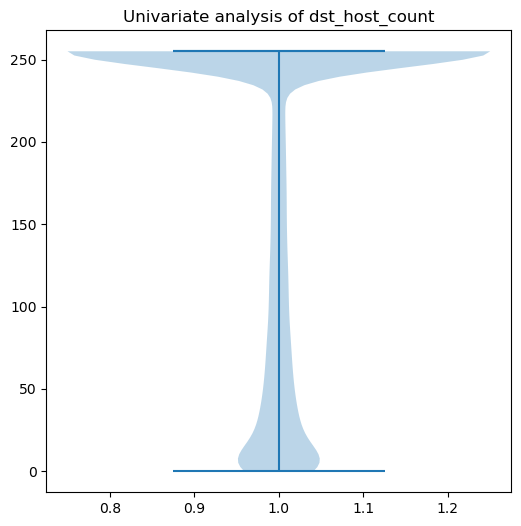

|       |   dst_host_srv_count |
|:------|---------------------:|
| count |           125973     |
| mean  |              115.653 |
| std   |              110.703 |
| min   |                0     |
| 25%   |               10     |
| 50%   |               63     |
| 75%   |              255     |
| max   |              255     |

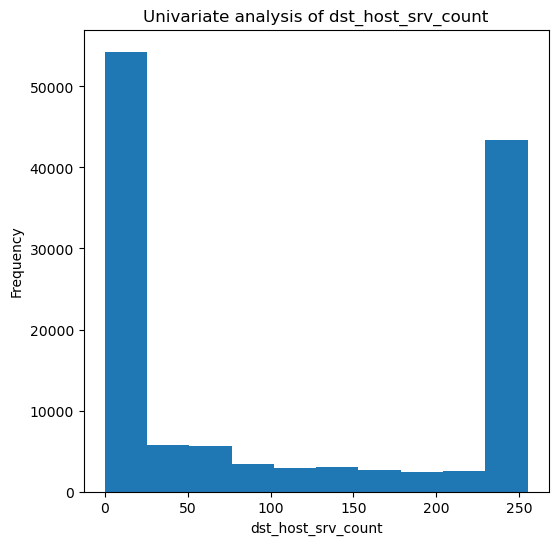

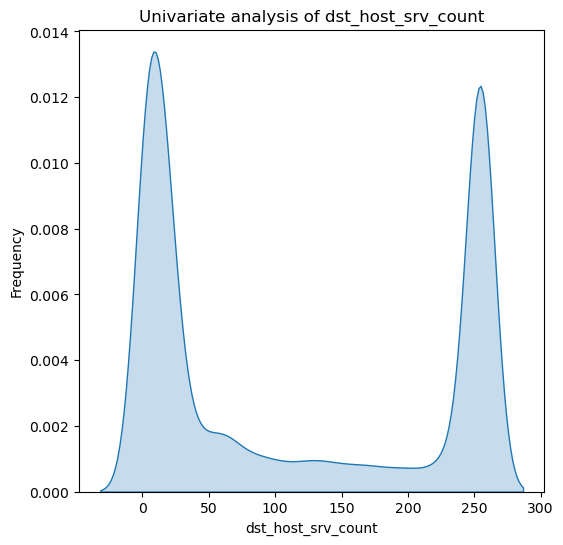

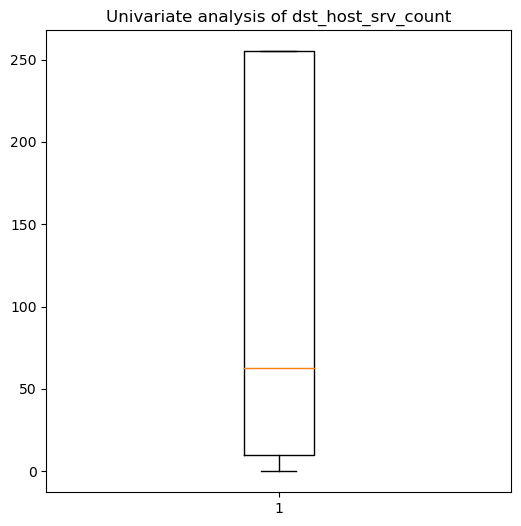

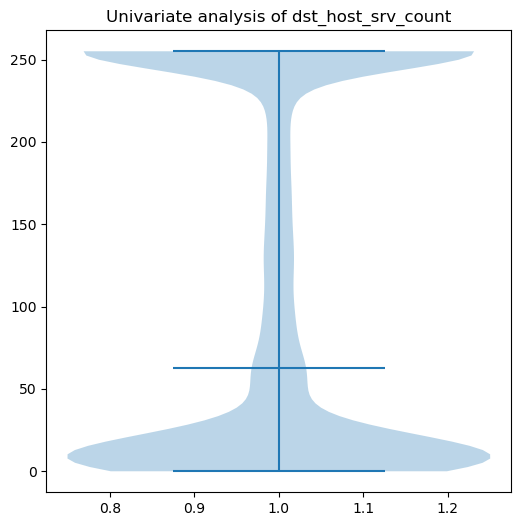

|       |   dst_host_same_srv_rate |
|:------|-------------------------:|
| count |            125973        |
| mean  |                 0.521242 |
| std   |                 0.448949 |
| min   |                 0        |
| 25%   |                 0.05     |
| 50%   |                 0.51     |
| 75%   |                 1        |
| max   |                 1        |

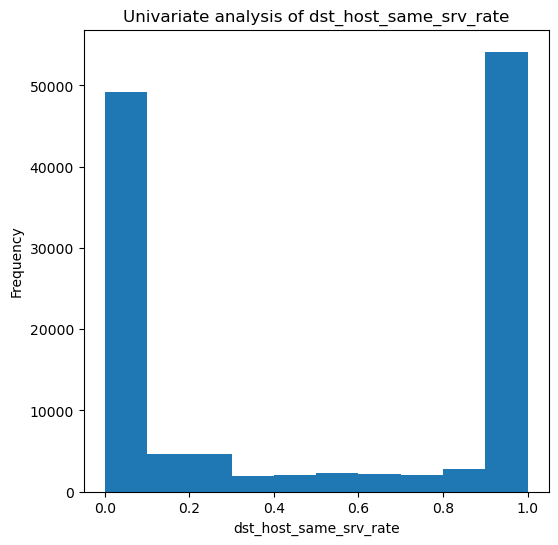

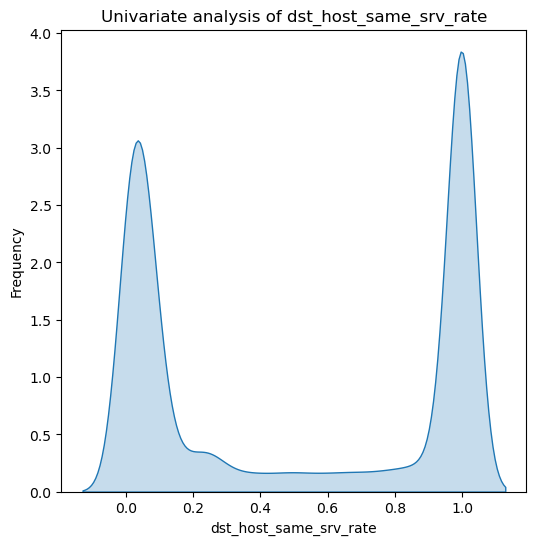

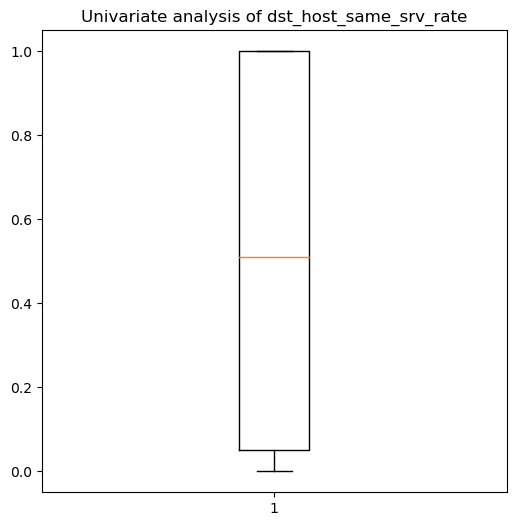

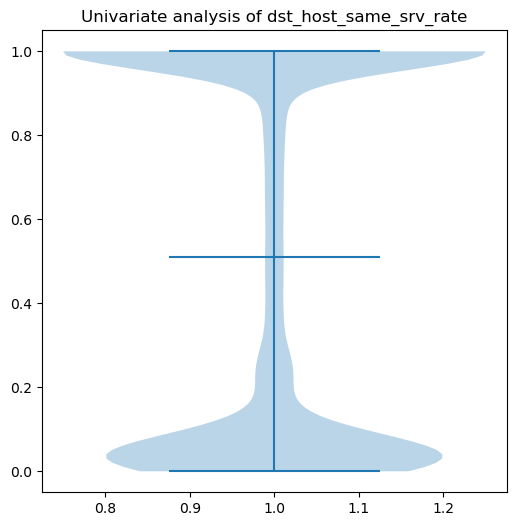

|       |   dst_host_diff_srv_rate |
|:------|-------------------------:|
| count |           125973         |
| mean  |                0.0829511 |
| std   |                0.188922  |
| min   |                0         |
| 25%   |                0         |
| 50%   |                0.02      |
| 75%   |                0.07      |
| max   |                1         |

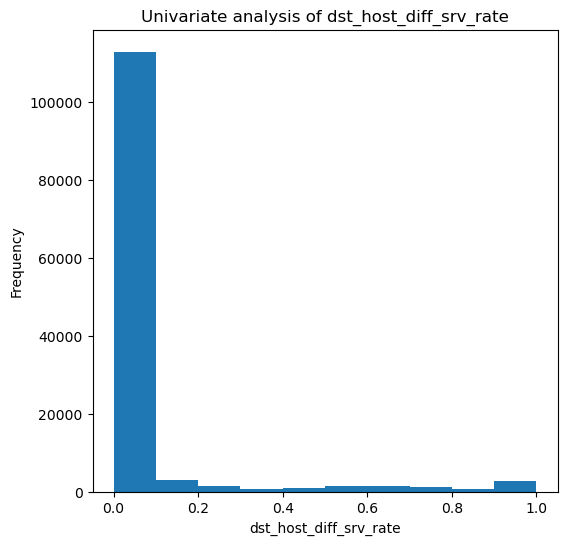

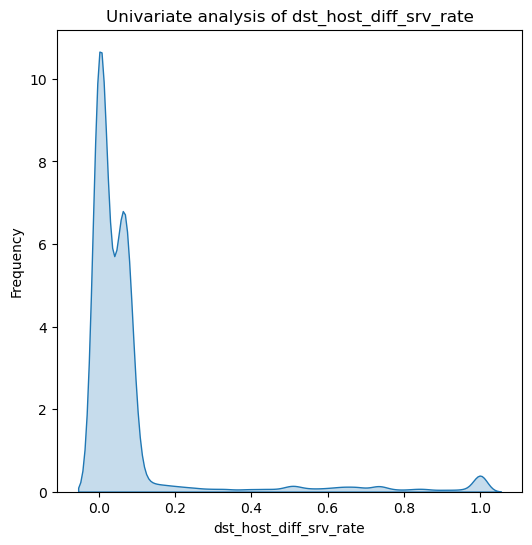

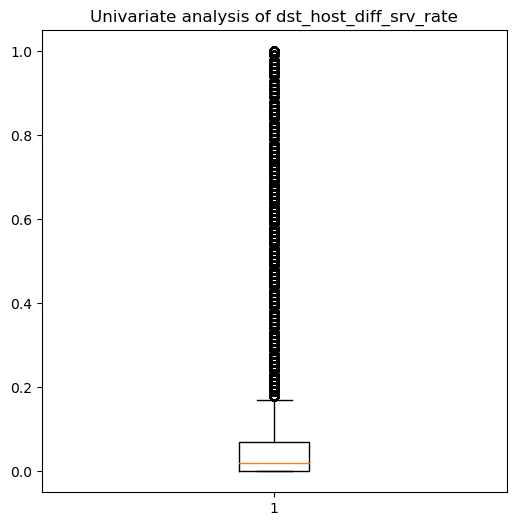

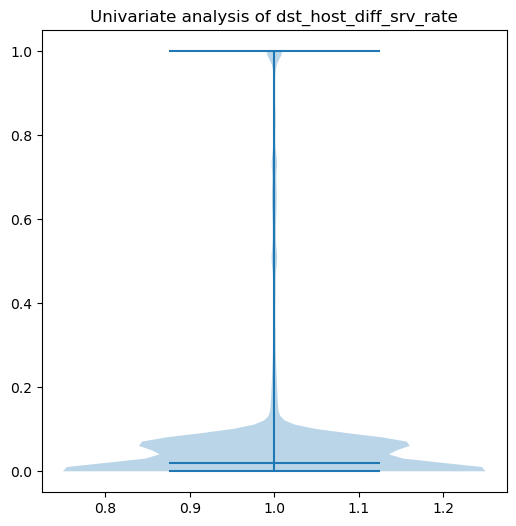

|       |   dst_host_same_src_port_rate |
|:------|------------------------------:|
| count |                 125973        |
| mean  |                      0.148379 |
| std   |                      0.308997 |
| min   |                      0        |
| 25%   |                      0        |
| 50%   |                      0        |
| 75%   |                      0.06     |
| max   |                      1        |

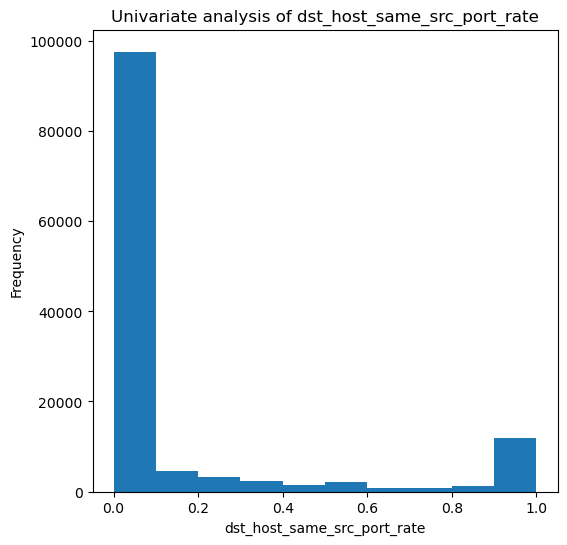

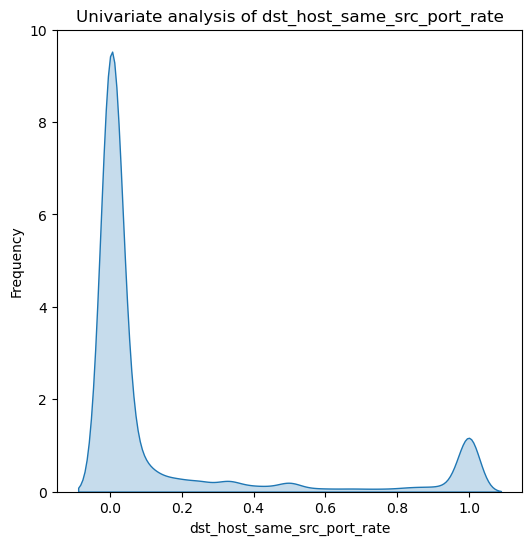

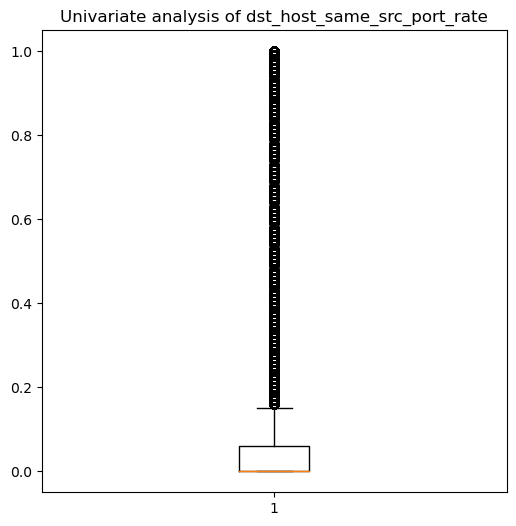

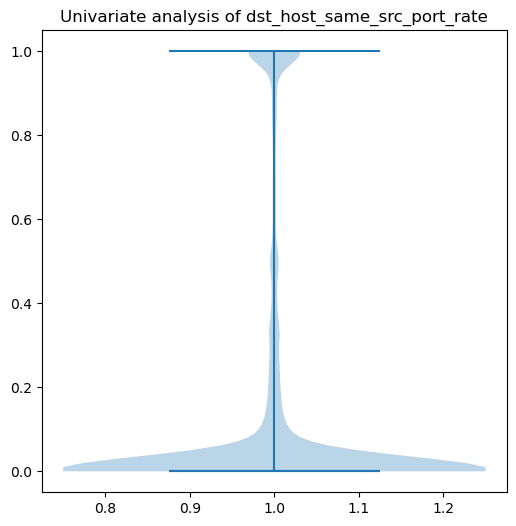

|       |   dst_host_srv_diff_host_rate |
|:------|------------------------------:|
| count |                125973         |
| mean  |                     0.0325424 |
| std   |                     0.112564  |
| min   |                     0         |
| 25%   |                     0         |
| 50%   |                     0         |
| 75%   |                     0.02      |
| max   |                     1         |

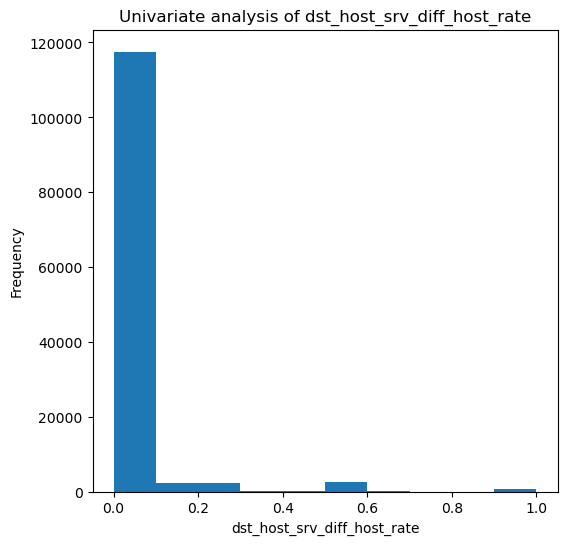

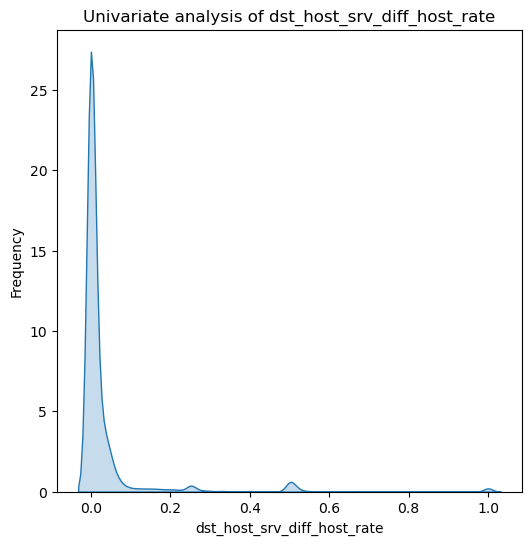

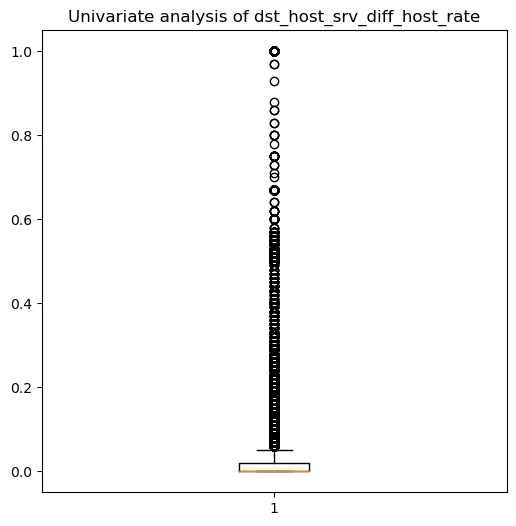

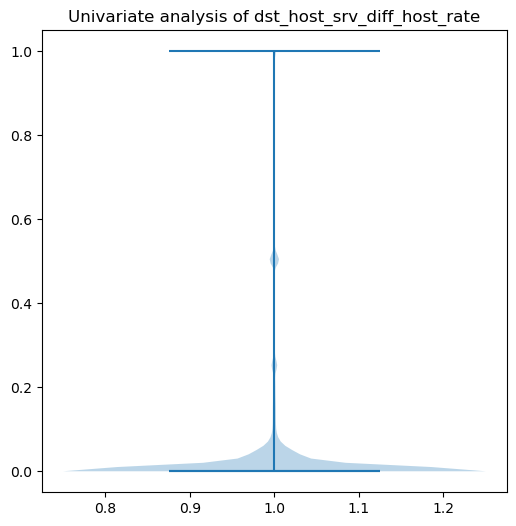

|       |   dst_host_serror_rate |
|:------|-----------------------:|
| count |          125973        |
| mean  |               0.284452 |
| std   |               0.444784 |
| min   |               0        |
| 25%   |               0        |
| 50%   |               0        |
| 75%   |               1        |
| max   |               1        |

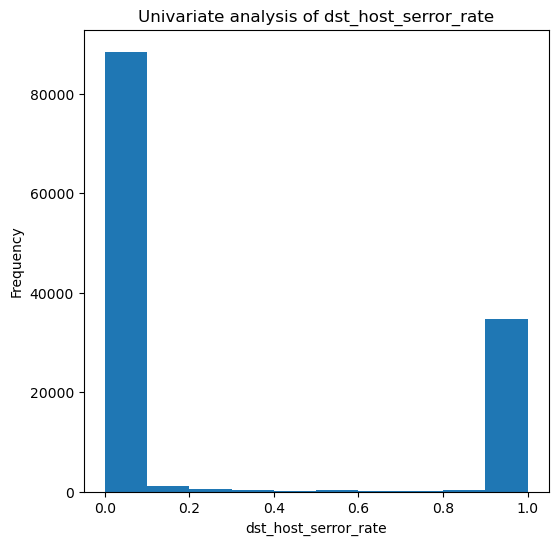

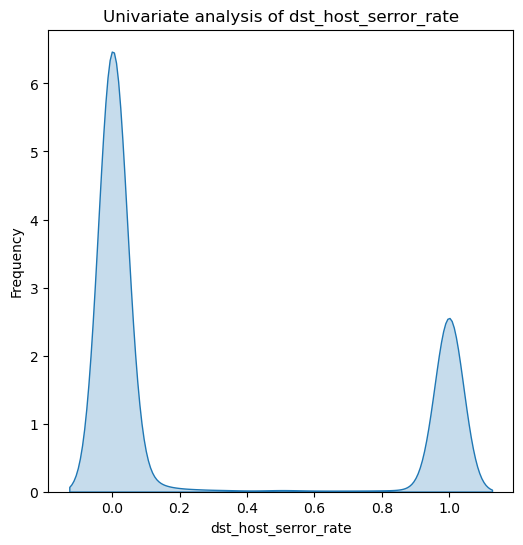

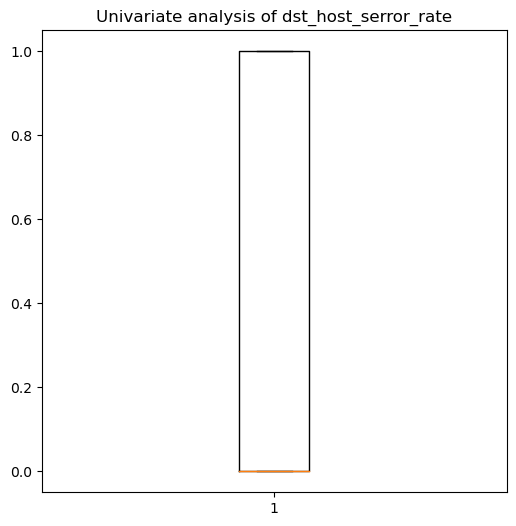

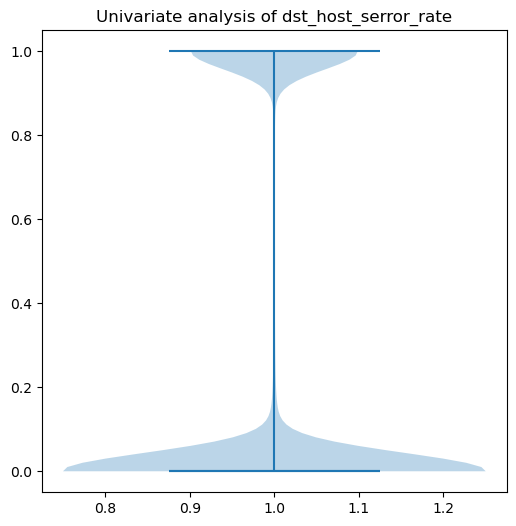

|       |   dst_host_srv_serror_rate |
|:------|---------------------------:|
| count |              125973        |
| mean  |                   0.278485 |
| std   |                   0.445669 |
| min   |                   0        |
| 25%   |                   0        |
| 50%   |                   0        |
| 75%   |                   1        |
| max   |                   1        |

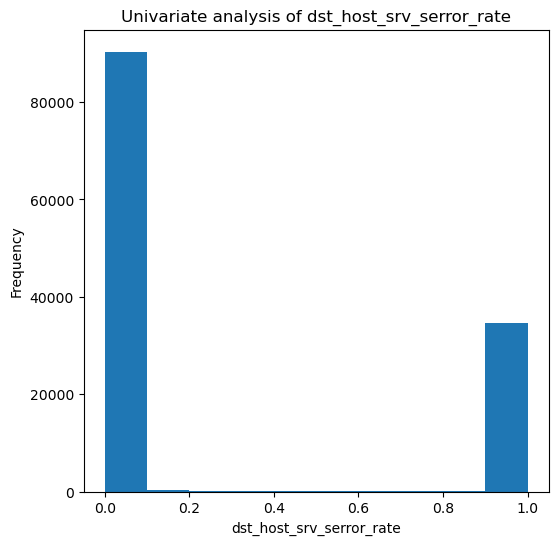

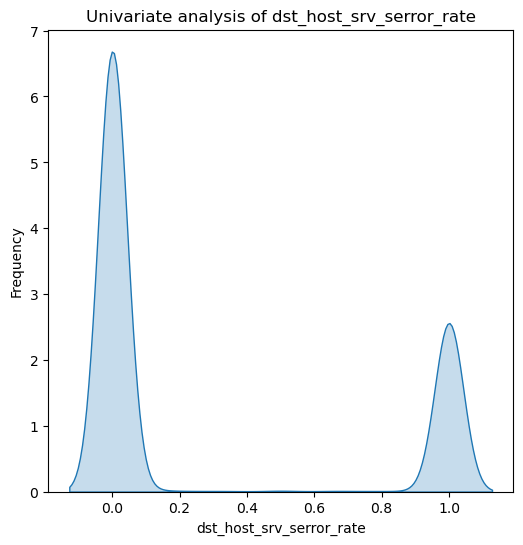

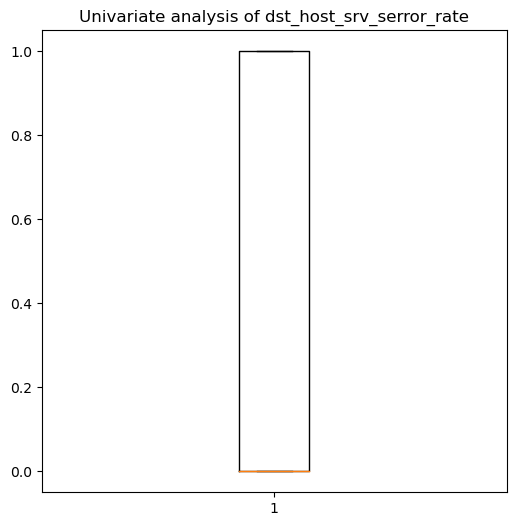

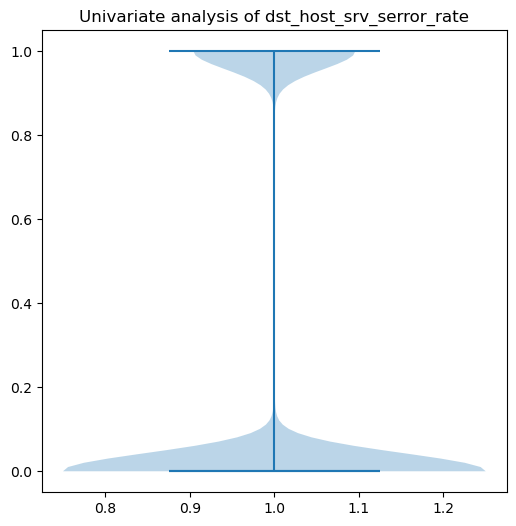

|       |   dst_host_rerror_rate |
|:------|-----------------------:|
| count |          125973        |
| mean  |               0.118832 |
| std   |               0.306557 |
| min   |               0        |
| 25%   |               0        |
| 50%   |               0        |
| 75%   |               0        |
| max   |               1        |

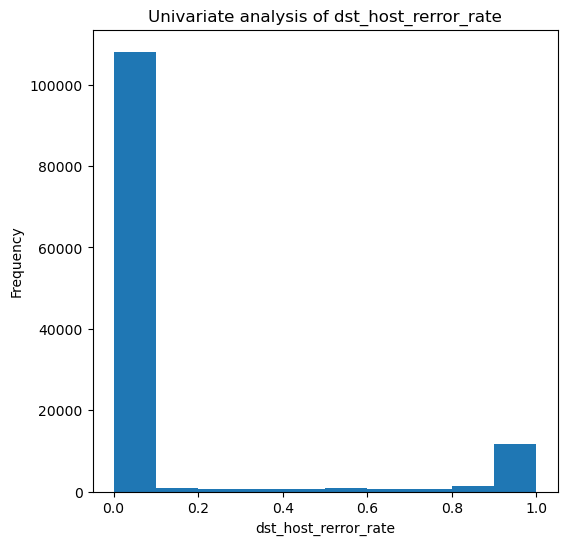

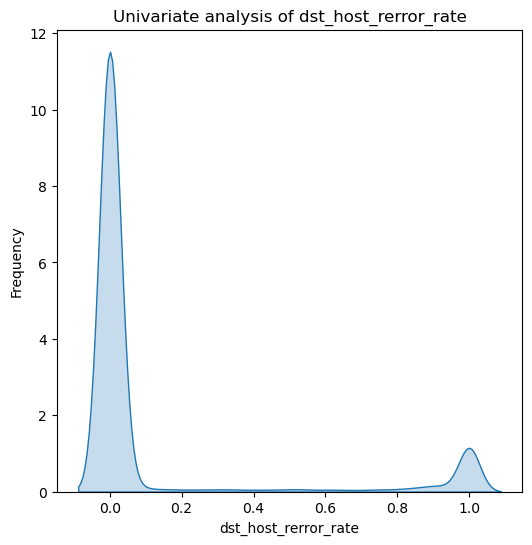

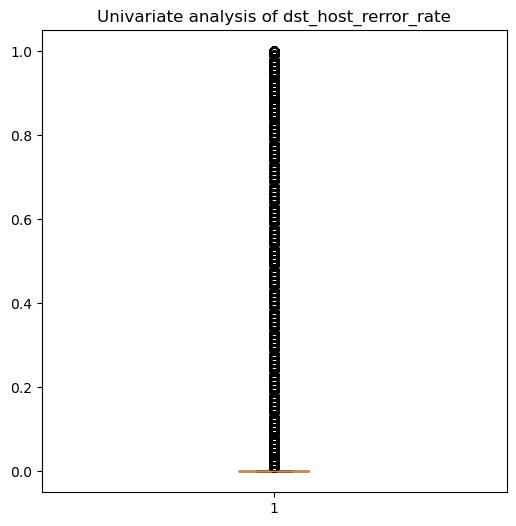

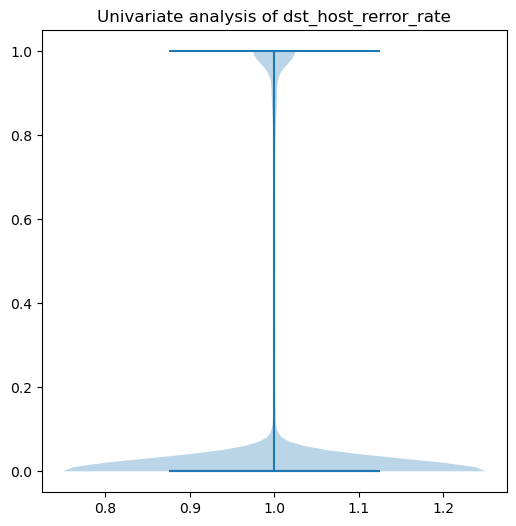

|       |   dst_host_srv_rerror_rate |
|:------|---------------------------:|
| count |              125973        |
| mean  |                   0.12024  |
| std   |                   0.319459 |
| min   |                   0        |
| 25%   |                   0        |
| 50%   |                   0        |
| 75%   |                   0        |
| max   |                   1        |

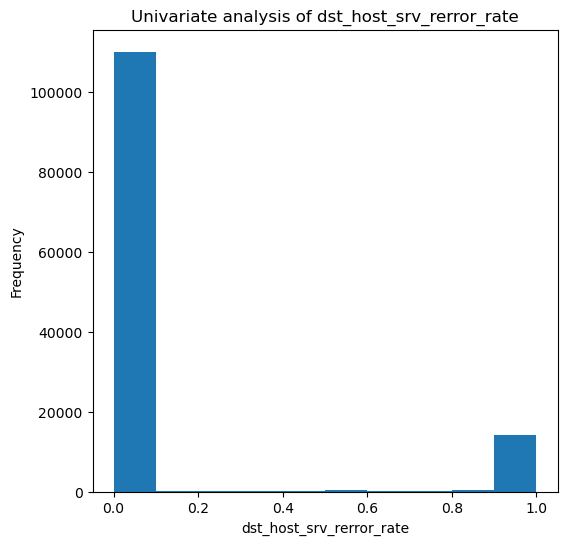

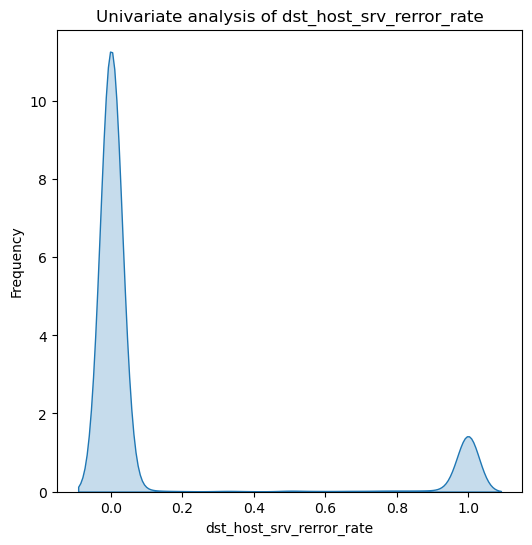

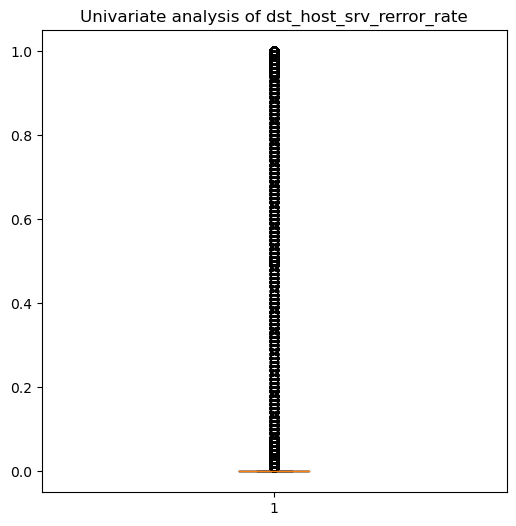

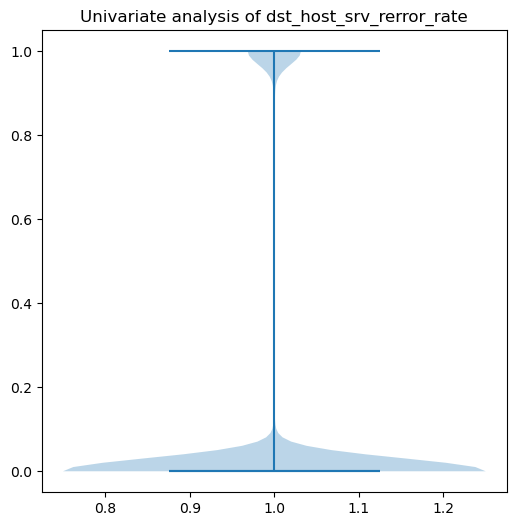

|                 |   Frequency |
|:----------------|------------:|
| normal          |       67343 |
| neptune         |       41214 |
| satan           |        3633 |
| ipsweep         |        3599 |
| portsweep       |        2931 |
| smurf           |        2646 |
| nmap            |        1493 |
| back            |         956 |
| teardrop        |         892 |
| warezclient     |         890 |
| pod             |         201 |
| guess_passwd    |          53 |
| buffer_overflow |          30 |
| warezmaster     |          20 |
| land            |          18 |
| imap            |          11 |
| rootkit         |          10 |
| loadmodule      |           9 |
| ftp_write       |           8 |
| multihop        |           7 |
| phf             |           4 |
| perl            |           3 |
| spy             |           2 |

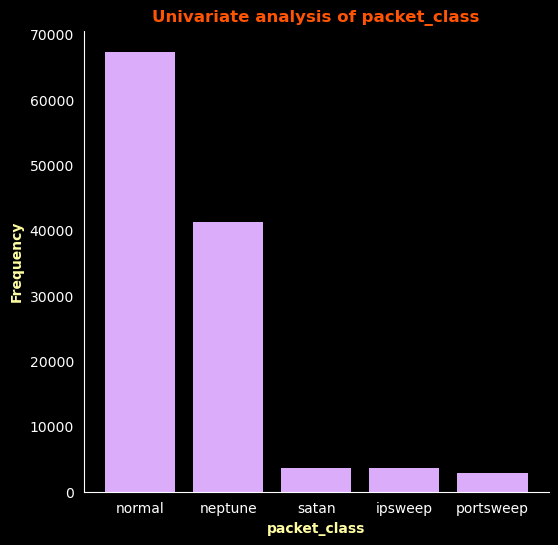

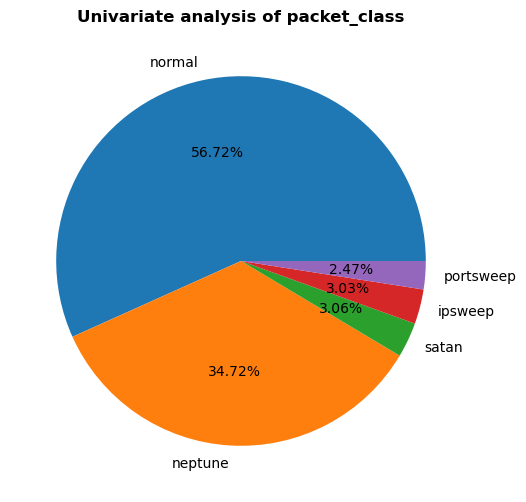

|       |   attack_class |
|:------|---------------:|
| count |    125973      |
| mean  |        19.5041 |
| std   |         2.2915 |
| min   |         0      |
| 25%   |        18      |
| 50%   |        20      |
| 75%   |        21      |
| max   |        21      |

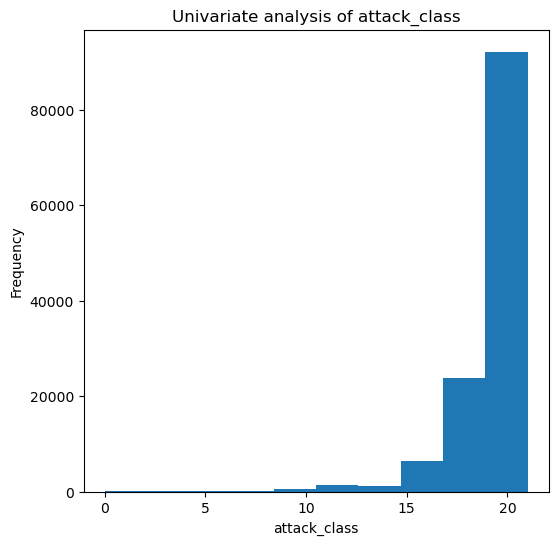

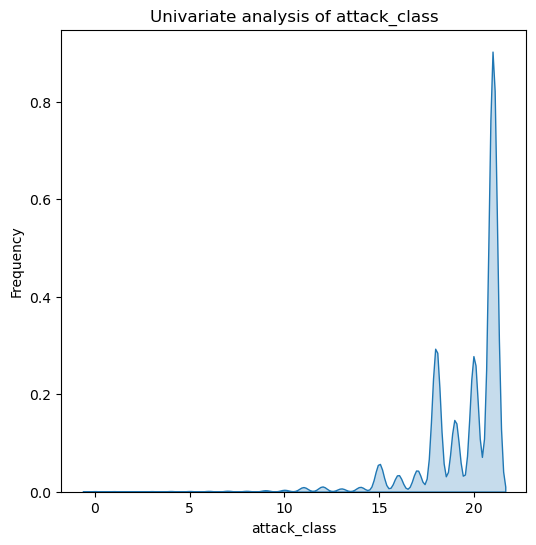

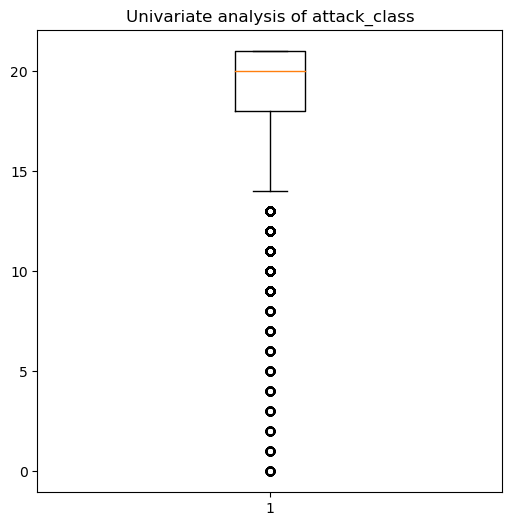

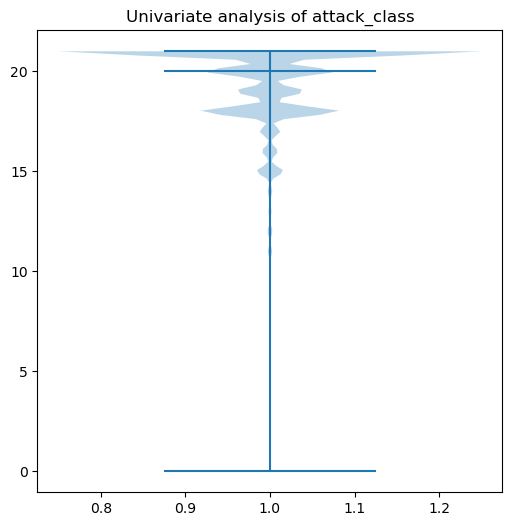

In [16]:
for i in df.columns:
    univariate_analysis(data=df[i],xlabel=i,ylabel='Frequency',title="Univariate analysis of "+str(i),color="#dbacfa")
    print()
    print()
    print("=================================================================================================================")
    print()
    print()